# AMC Loyalty Program Analytics


## Table of Contents
* [1. The Problem](#quest_1)
* [2. Data Cleaning and Transformation](#quest_2)
* [3. & 4. Data Visualization & EDA](#quest_3)

* [5. Classification Models](#quest_5)
    * [Decision Tree](#CM1)
    * [Logistic Regression](#CM3)
    * [Random Forest Classifier](#CM4)


* [6. Feature Selection](#quest_6)
    * [Recursive Feature Elimination](#FS3)


* [7. Model Selection](#quest_7)


* [RBF SVC: Radial Basis Function - Support Vector Classifier](#NT2)


* [9. Results](#quest_9)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

import pydotplus as pdot

from patsy import dmatrices

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
#import RandomForestClassifer
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler

#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Define some styles used for printing
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
# Make Jupyter Notebook cells a little wider
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:50% !important; }</style>"))

<a id='quest_1'></a>
## 1. The Problem
AMC theaters now offers two levels of loyalty programs.  One is the Insider program which is free and the other is the Premier membership which is a paid loyalty program.  Given the dataset containing Insider members and Premier members who converted from being Insider members, AMC would like to identify people who have, or would, upgrade to the paid program.






<div class="markdown-converter__text--rendered"><p><em><b>AMC Dataset Description</b></em></p>

<a id='quest_2'></a>
## 2. Data Cleaning and Transformation

#### Load the HR Data

In [3]:
#Read AMC data
df=pd.read_csv("data/AMCSampleData_InsiderPremier.csv")
df.head()

ISPREMIER  AGE21PLUSINDICATOR  AGE18TO21INDICATOR  AGE13TO18INDICATOR  \
0          1                   1                   0                   0   
1          1                   1                   0                   0   
2          1                   1                   0                   0   
3          0                   1                   0                   0   
4          1                   1                   0                   0   

   GENDERCODE   BIRTHDATE  AMCSTUBSLOYALTYEMAILOFFEROPTININDICATOR  \
0           3   1/13/1976                                        0   
1           1    7/6/1983                                        0   
2           3  10/20/1970                                        0   
3           0   7/10/1967                                        0   
4           1    8/1/1994                                        1   

   AMCSTUBSREWARDSEMAILOPTININDICATOR  AMCSTUBSREWARDSMOBILEOPTININDICATOR  \
0                                   0                                    0   
1                                   0                                    1   
2                                   0                                    0   
3                                   1                                    1   
4                                   1                                    1   

   AMCSTUBSREWARDSSMSOPTININDICATOR        ...          \
0                                 0        ...           
1                                 0        ...           
2                                 0        ...           
3                                 0        ...           
4                                 0        ...           

   ONLINEFEESWAIVEDAMOUNT  ESTIMATEDINCOMERANGE  \
0                   61.25                     0   
1                  123.00                     3   
2                  182.50                     0   
3                   47.75                     9   
4                   45.00                     8   

   ESTIMATEDHOMEMARKETVALUERANGE  CHILDRENPRESENCE  \
0                              0                 3   
1                             13                 0   
2                              0                 3   
3                             13                 1   
4                              6                 3   

   HASFREQUENTVISITTHEATRENUMBER  TICKETQTYSUM  TICKETBALANCEDUESUM  \
0                              1            51               969.09   
1                              0            40               842.00   
2                              1            49               675.66   
3                              1            38               616.61   
4                              1            47               607.53   

   CONCQTYSUM  CONCLOYDISCOUNTAMTSUM  CONCBALANCEDUESUM  
0           7                    0.0              41.71  
1           1                   -1.0               7.49  
2           4                    0.0              25.42  
3          72                   -7.0             474.14  
4          10                   -2.0              63.60  

[5 rows x 24 columns]

In [4]:
# Look at info() and basic statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47168 entries, 0 to 47167
Data columns (total 24 columns):
ISPREMIER                                   47168 non-null int64
AGE21PLUSINDICATOR                          47168 non-null int64
AGE18TO21INDICATOR                          47168 non-null int64
AGE13TO18INDICATOR                          47168 non-null int64
GENDERCODE                                  47168 non-null int64
BIRTHDATE                                   47168 non-null object
AMCSTUBSLOYALTYEMAILOFFEROPTININDICATOR     47168 non-null int64
AMCSTUBSREWARDSEMAILOPTININDICATOR          47168 non-null int64
AMCSTUBSREWARDSMOBILEOPTININDICATOR         47168 non-null int64
AMCSTUBSREWARDSSMSOPTININDICATOR            47168 non-null int64
AMCSTUBSTHEATREMOBILEOFFEROPTININDICATOR    47168 non-null int64
AMCSTUBSTHEATRESMSOFFEROPTININDICATOR       47168 non-null int64
LIFETIMEAMCSTUBSAWARDSEARNEDAMOUNT          47168 non-null float64
LIFETIMEAMCSTUBSSPENDAMOUNT                

ISPREMIER  AGE21PLUSINDICATOR  AGE18TO21INDICATOR  \
count  47168.000000        47168.000000        47168.000000   
mean       0.115354            0.892660            0.063920   
std        0.319452            0.309548            0.244614   
min        0.000000            0.000000            0.000000   
25%        0.000000            1.000000            0.000000   
50%        0.000000            1.000000            0.000000   
75%        0.000000            1.000000            0.000000   
max        1.000000            1.000000            1.000000   

       AGE13TO18INDICATOR    GENDERCODE  \
count        47168.000000  47168.000000   
mean             0.038543      2.460778   
std              0.192505      1.081705   
min              0.000000      0.000000   
25%              0.000000      3.000000   
50%              0.000000      3.000000   
75%              0.000000      3.000000   
max              1.000000      3.000000   

       AMCSTUBSLOYALTYEMAILOFFEROPTININDICATOR  \
count                             47168.000000   
mean                                  0.816761   
std                                   0.386866   
min                                   0.000000   
25%                                   1.000000   
50%                                   1.000000   
75%                                   1.000000   
max                                   1.000000   

       AMCSTUBSREWARDSEMAILOPTININDICATOR  \
count                        47168.000000   
mean                             0.859078   
std                              0.347945   
min                              0.000000   
25%                              1.000000   
50%                              1.000000   
75%                              1.000000   
max                              1.000000   

       AMCSTUBSREWARDSMOBILEOPTININDICATOR  AMCSTUBSREWARDSSMSOPTININDICATOR  \
count                         47168.000000                      47168.000000   
mean                              0.503053                          0.000042   
std                               0.499996                          0.006512   
min                               0.000000                          0.000000   
25%                               0.000000                          0.000000   
50%                               1.000000                          0.000000   
75%                               1.000000                          0.000000   
max                               1.000000                          1.000000   

       AMCSTUBSTHEATREMOBILEOFFEROPTININDICATOR        ...          \
count                              47168.000000        ...           
mean                                   0.508035        ...           
std                                    0.499941        ...           
min                                    0.000000        ...           
25%                                    0.000000        ...           
50%                                    1.000000        ...           
75%                                    1.000000        ...           
max                                    1.000000        ...           

       ONLINEFEESWAIVEDAMOUNT  ESTIMATEDINCOMERANGE  \
count            47168.000000          47168.000000   
mean                 2.075994              1.046875   
std                 24.918020              2.470250   
min                  0.000000              0.000000   
25%                  0.000000              0.000000   
50%                  0.000000              0.000000   
75%                  0.000000              0.000000   
max               1815.000000              9.000000   

       ESTIMATEDHOMEMARKETVALUERANGE  CHILDRENPRESENCE  \
count                   47168.000000      47168.000000   
mean                        2.114760          2.679083   
std                         4.641638          0.810694   
min                         0.000000          0.000000   
25%                         0.000000          3.000000   
5

There does not appear to be any obvious data quality issues such as null values that seem out of range.

### Abbreviate the variable names

In [5]:
df=df.rename(columns={'AGE21PLUSINDICATOR': 'AGE21PLUS', 'AGE18TO21INDICATOR': 'AGE18TO21','AGE13TO18INDICATOR': 'AGE13TO18',
                      'AMCSTUBSLOYALTYEMAILOFFEROPTININDICATOR': 'LOYALTY_EMAIL_OFFER', 'AMCSTUBSREWARDSEMAILOPTININDICATOR': 'REWARD_EMAIL',
                      'AMCSTUBSREWARDSMOBILEOPTININDICATOR': 'REWARD_MOBILE', 'AMCSTUBSREWARDSSMSOPTININDICATOR': 'REWARD_SMS',
                      'AMCSTUBSTHEATREMOBILEOFFEROPTININDICATOR': 'THEATR_MOB_OFFER', 'AMCSTUBSTHEATRESMSOFFEROPTININDICATOR': 'THEATR_SMS_OFFER',
                      'LIFETIMEAMCSTUBSAWARDSEARNEDAMOUNT': 'LIFE_AWARD_AMT', 'LIFETIMEAMCSTUBSSPENDAMOUNT': 'LIFE_SPEND_AMT',
                      'ONLINEFEESWAIVEDAMOUNT': 'OL_FEE_WAIVE_AMT', 'ESTIMATEDINCOMERANGE': 'EST_INC_RNG',
                      'ESTIMATEDHOMEMARKETVALUERANGE': 'EST_HOME_VAL_RNG', 'CHILDRENPRESENCE': 'CHILD_PRES',
                      'HASFREQUENTVISITTHEATRENUMBER': 'FREQ_THEATRE', 'TICKETQTYSUM': 'TICKET_QTY',
                      'TICKETBALANCEDUESUM': 'TICKET_BAL', 'CONCLOYDISCOUNTAMTSUM': 'CONCLOYDISC', 'CONCBALANCEDUESUM': 'CONC_BAL'
                       })
df.head()

ISPREMIER  AGE21PLUS  AGE18TO21  AGE13TO18  GENDERCODE   BIRTHDATE  \
0          1          1          0          0           3   1/13/1976   
1          1          1          0          0           1    7/6/1983   
2          1          1          0          0           3  10/20/1970   
3          0          1          0          0           0   7/10/1967   
4          1          1          0          0           1    8/1/1994   

   LOYALTY_EMAIL_OFFER  REWARD_EMAIL  REWARD_MOBILE  REWARD_SMS    ...     \
0                    0             0              0           0    ...      
1                    0             0              1           0    ...      
2                    0             0              0           0    ...      
3                    0             1              1           0    ...      
4                    1             1              1           0    ...      

   OL_FEE_WAIVE_AMT  EST_INC_RNG  EST_HOME_VAL_RNG  CHILD_PRES  FREQ_THEATRE  \
0             61.25            0                 0           3             1   
1            123.00            3                13           0             0   
2            182.50            0                 0           3             1   
3             47.75            9                13           1             1   
4             45.00            8                 6           3             1   

   TICKET_QTY  TICKET_BAL  CONCQTYSUM  CONCLOYDISC  CONC_BAL  
0          51      969.09           7          0.0     41.71  
1          40      842.00           1         -1.0      7.49  
2          49      675.66           4          0.0     25.42  
3          38      616.61          72         -7.0    474.14  
4          47      607.53          10         -2.0     63.60  

[5 rows x 24 columns]

In [6]:
pd.set_option('display.max_columns', 30)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47168 entries, 0 to 47167
Data columns (total 24 columns):
ISPREMIER              47168 non-null int64
AGE21PLUS              47168 non-null int64
AGE18TO21              47168 non-null int64
AGE13TO18              47168 non-null int64
GENDERCODE             47168 non-null int64
BIRTHDATE              47168 non-null object
LOYALTY_EMAIL_OFFER    47168 non-null int64
REWARD_EMAIL           47168 non-null int64
REWARD_MOBILE          47168 non-null int64
REWARD_SMS             47168 non-null int64
THEATR_MOB_OFFER       47168 non-null int64
THEATR_SMS_OFFER       47168 non-null int64
LIFE_AWARD_AMT         47168 non-null float64
LIFE_SPEND_AMT         47168 non-null float64
OL_FEE_WAIVE_AMT       47168 non-null float64
EST_INC_RNG            47168 non-null int64
EST_HOME_VAL_RNG       47168 non-null int64
CHILD_PRES             47168 non-null int64
FREQ_THEATRE           47168 non-null int64
TICKET_QTY             47168 non-null int64
TICK

ISPREMIER     AGE21PLUS     AGE18TO21     AGE13TO18    GENDERCODE  \
count  47168.000000  47168.000000  47168.000000  47168.000000  47168.000000   
mean       0.115354      0.892660      0.063920      0.038543      2.460778   
std        0.319452      0.309548      0.244614      0.192505      1.081705   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      0.000000      0.000000      3.000000   
50%        0.000000      1.000000      0.000000      0.000000      3.000000   
75%        0.000000      1.000000      0.000000      0.000000      3.000000   
max        1.000000      1.000000      1.000000      1.000000      3.000000   

       LOYALTY_EMAIL_OFFER  REWARD_EMAIL  REWARD_MOBILE    REWARD_SMS  \
count         47168.000000  47168.000000   47168.000000  47168.000000   
mean              0.816761      0.859078       0.503053      0.000042   
std               0.386866      0.347945       0.499996      0.006512   
min               0.000000      0.000000       0.000000      0.000000   
25%               1.000000      1.000000       0.000000      0.000000   
50%               1.000000      1.000000       1.000000      0.000000   
75%               1.000000      1.000000       1.000000      0.000000   
max               1.000000      1.000000       1.000000      1.000000   

       THEATR_MOB_OFFER  THEATR_SMS_OFFER  LIFE_AWARD_AMT  LIFE_SPEND_AMT  \
count      47168.000000      47168.000000    47168.000000    47168.000000   
mean           0.508035          0.000042        4.877686       51.843208   
std            0.499941          0.006512       30.804161      293.911215   
min            0.000000          0.000000        0.000000      -91.390000   
25%            0.000000          0.000000        0.000000        0.000000   
50%            1.000000          0.000000        0.000000        2.940000   
75%            1.000000          0.000000        0.000000        9.200000   
max            1.000000          1.000000      804.000000     7902.850000   

       OL_FEE_WAIVE_AMT   EST_INC_RNG  EST_HOME_VAL_RNG    CHILD_PRES  \
count      47168.000000  47168.000000      47168.000000  47168.000000   
mean           2.075994      1.046875          2.114760      2.679083   
std           24.918020      2.470250          4.641638      0.810694   
min            0.000000      0.000000          0.000000      0.000000   
25%            0.000000      0.000000          0.000000      3.000000   
50%            0.000000      0.000000          0.000000      3.000000   
75%            0.000000      0.000000          0.000000      3.000000   
max         1815.000000      9.000000         19.000000      3.000000   

       FREQ_THEATRE    TICKET_QTY    TICKET_BAL    CONCQTYSUM   CONCLOYDISC  \
count  47168.000000  47168.000000  47168.000000  47168.000000  47168.000000   
mean       0.343432      2.282692     22.919615      1.968262     -0.197280   
std        0.474859      3.821639     39.623308      4.255762      1.015473   
min        0.000000      0.000000      0.000000      0.000000    -17.680000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      7.980000      0.000000      0.000000   
75%        1.000000      3.000000     30.780000      3.000000      0.000000   
max        1.000000     68.000000    969.090000     87.000000      0.000000   

           CONC_BAL  
count  47168.000000  
mean      11.325645  
std       23.843980  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       15.190000  
max      517.180000

In [7]:
#df['CHILD_PRES'].goupby
df.pivot_table(index=['CHILD_PRES'], aggfunc=[len])

len                                                       \
           AGE13TO18 AGE18TO21 AGE21PLUS BIRTHDATE CONCLOYDISC CONCQTYSUM   
CHILD_PRES                                                                  
0               1861      1861      1861      1861      1861.0       1861   
1               4777      4777      4777      4777      4777.0       4777   
3              40530     40530     40530     40530     40530.0      40530   

                                                                          \
           CONC_BAL EST_HOME_VAL_RNG EST_INC_RNG FREQ_THEATRE GENDERCODE   
CHILD_PRES                                                                 
0            1861.0             1861        1861         1861       1861   
1            4777.0             4777        4777         4777       4777   
3           40530.0            40530       40530        40530      40530   

                                                                        \
           ISPREMIER LIFE_AWARD_AMT LIFE_SPEND_AMT LOYALTY_EMAIL_OFFER   
CHILD_PRES                                                               
0               1861         1861.0         1861.0                1861   
1               4777         4777.0         4777.0                4777   
3              40530        40530.0        40530.0               40530   

                                                                   \
           OL_FEE_WAIVE_AMT REWARD_EMAIL REWARD_MOBILE REWARD_SMS   
CHILD_PRES                                                          
0                    1861.0         1861          1861       1861   
1                    4777.0         4777          4777       4777   
3                   40530.0        40530         40530      40530   

                                                                    
           THEATR_MOB_OFFER THEATR_SMS_OFFER TICKET_BAL TICKET_QTY  
CHILD_PRES                                                          
0                      1861             1861     1861.0       1861  
1                      4777             4777     4777.0       4777  
3                     40530            40530    40530.0      40530

In [8]:
#Calculate AGE
#Start with number of days
numdays = pd.datetime.now().date() - pd.to_datetime(df['BIRTHDATE'])
#Convert to integer number
intdays = numdays.dt.days
# Convert to age in years
age = (intdays/365).astype(np.int64)
df['AGE']=age


In [9]:
#Drop BDay
df=df.drop(['BIRTHDATE'], axis=1)
df.head()



ISPREMIER  AGE21PLUS  AGE18TO21  AGE13TO18  GENDERCODE  \
0          1          1          0          0           3   
1          1          1          0          0           1   
2          1          1          0          0           3   
3          0          1          0          0           0   
4          1          1          0          0           1   

   LOYALTY_EMAIL_OFFER  REWARD_EMAIL  REWARD_MOBILE  REWARD_SMS  \
0                    0             0              0           0   
1                    0             0              1           0   
2                    0             0              0           0   
3                    0             1              1           0   
4                    1             1              1           0   

   THEATR_MOB_OFFER  THEATR_SMS_OFFER  LIFE_AWARD_AMT  LIFE_SPEND_AMT  \
0                 0                 0           265.0         2706.45   
1                 1                 0           215.0         2113.36   
2                 0                 0           210.0         2141.80   
3                 0                 0           170.0         1749.20   
4                 1                 0           290.0         2822.35   

   OL_FEE_WAIVE_AMT  EST_INC_RNG  EST_HOME_VAL_RNG  CHILD_PRES  FREQ_THEATRE  \
0             61.25            0                 0           3             1   
1            123.00            3                13           0             0   
2            182.50            0                 0           3             1   
3             47.75            9                13           1             1   
4             45.00            8                 6           3             1   

   TICKET_QTY  TICKET_BAL  CONCQTYSUM  CONCLOYDISC  CONC_BAL  AGE  
0          51      969.09           7          0.0     41.71   41  
1          40      842.00           1         -1.0      7.49   34  
2          49      675.66           4          0.0     25.42   47  
3          38      616.61          72         -7.0    474.14   50  
4          47      607.53          10         -2.0     63.60   23

In [10]:
# Create Gender dummy variables
gender_dummies = pd.get_dummies(df['GENDERCODE'], prefix='GENDER')
df = pd.concat([df, gender_dummies], axis=1)

In [11]:
# Create Chidren dummy variables
child_dummies = pd.get_dummies(df['CHILD_PRES'], prefix='CHILD')
df = pd.concat([df, child_dummies], axis=1)

In [12]:
# Now drop CHILD_PRES column
df = df.drop(['CHILD_PRES'], axis=1)
df.head()

ISPREMIER  AGE21PLUS  AGE18TO21  AGE13TO18  GENDERCODE  \
0          1          1          0          0           3   
1          1          1          0          0           1   
2          1          1          0          0           3   
3          0          1          0          0           0   
4          1          1          0          0           1   

   LOYALTY_EMAIL_OFFER  REWARD_EMAIL  REWARD_MOBILE  REWARD_SMS  \
0                    0             0              0           0   
1                    0             0              1           0   
2                    0             0              0           0   
3                    0             1              1           0   
4                    1             1              1           0   

   THEATR_MOB_OFFER  THEATR_SMS_OFFER  LIFE_AWARD_AMT  LIFE_SPEND_AMT  \
0                 0                 0           265.0         2706.45   
1                 1                 0           215.0         2113.36   
2                 0                 0           210.0         2141.80   
3                 0                 0           170.0         1749.20   
4                 1                 0           290.0         2822.35   

   OL_FEE_WAIVE_AMT  EST_INC_RNG  EST_HOME_VAL_RNG  FREQ_THEATRE  TICKET_QTY  \
0             61.25            0                 0             1          51   
1            123.00            3                13             0          40   
2            182.50            0                 0             1          49   
3             47.75            9                13             1          38   
4             45.00            8                 6             1          47   

   TICKET_BAL  CONCQTYSUM  CONCLOYDISC  CONC_BAL  AGE  GENDER_0  GENDER_1  \
0      969.09           7          0.0     41.71   41         0         0   
1      842.00           1         -1.0      7.49   34         0         1   
2      675.66           4          0.0     25.42   47         0         0   
3      616.61          72         -7.0    474.14   50         1         0   
4      607.53          10         -2.0     63.60   23         0         1   

   GENDER_3  CHILD_0  CHILD_1  CHILD_3  
0         1        0        0        1  
1         0        1        0        0  
2         1        0        0        1  
3         0        0        1        0  
4         0        0        0        1

In [13]:
df['UNK_INC']=0
df.loc[(df['EST_INC_RNG']==0),'UNK_INC']=1

df['UNK_HOME']=0
df.loc[(df['EST_HOME_VAL_RNG']==0),'UNK_HOME']=1


#### Review Categorical Data

<a id='quest_3'></a>
## 3. & 4. Data Visualization & EDA

<a id='V1'></a>
#### Pivot table grouped by 'left'

In [14]:
#Create a pivot table, grouping by 'ISPREMIER'
df.pivot_table(index=['ISPREMIER'], aggfunc=[np.mean])
#df.pivot_table(index=['ISPREMIER'], aggfunc=[len])


mean                                                    \
                 AGE AGE13TO18 AGE18TO21 AGE21PLUS   CHILD_0   CHILD_1   
ISPREMIER                                                                
0          38.469049  0.042371  0.068852  0.885829  0.035301  0.091476   
1          41.505606  0.009189  0.026098  0.945047  0.071310  0.176438   

                                                                        \
            CHILD_3 CONCLOYDISC CONCQTYSUM   CONC_BAL EST_HOME_VAL_RNG   
ISPREMIER                                                                
0          0.873224   -0.073994   1.450332   8.343932         1.885542   
1          0.752251   -1.142762   5.940268  34.192389         3.872634   

                                                                             \
          EST_INC_RNG FREQ_THEATRE GENDERCODE  GENDER_0  GENDER_1  GENDER_3   
ISPREMIER                                                                     
0            0.929302     0.359887   2.561986  0.107101  0.058356  0.834544   
1            1.948539     0.217239   1.684617  0.283588  0.232310  0.484102   

                                                                              \
          LIFE_AWARD_AMT LIFE_SPEND_AMT LOYALTY_EMAIL_OFFER OL_FEE_WAIVE_AMT   
ISPREMIER                                                                      
0               2.465999      28.407121            0.814293         1.490396   
1              23.372900     231.574439            0.835692         6.566945   

                                                                  \
          REWARD_EMAIL REWARD_MOBILE REWARD_SMS THEATR_MOB_OFFER   
ISPREMIER                                                          
0             0.856951      0.485681   0.000048         0.489659   
1             0.875391      0.636280   0.000000         0.648962   

                                                                      
          THEATR_SMS_OFFER TICKET_BAL TICKET_QTY  UNK_HOME   UNK_INC  
ISPREMIER                                                             
0                 0.000048  16.496813   1.656074  0.806097  0.847988  
1                 0.000000  72.176043   7.088219  0.631685  0.693439

In [15]:
#Create a pivot table, grouping by 'ISPREMIER'
#df.pivot_table(index=['ISPREMIER','UNK_INC','UNK_HOME'], aggfunc=[np.mean])
df.pivot_table(index=['ISPREMIER','UNK_INC'], aggfunc=[np.mean])



mean                                          \
                         AGE AGE13TO18 AGE18TO21 AGE21PLUS   CHILD_0   
ISPREMIER UNK_INC                                                      
0         0        42.021441  0.017342  0.043355  0.933943  0.231279   
          1        37.832241  0.046857  0.073423  0.877204  0.000170   
1         0        44.097722  0.004197  0.010791  0.962230  0.231415   
          1        40.359661  0.011397  0.032865  0.937450  0.000530   

                                                                         \
                    CHILD_1   CHILD_3 CONCLOYDISC CONCQTYSUM   CONC_BAL   
ISPREMIER UNK_INC                                                         
0         0        0.576699  0.192023   -0.146678   1.804824  10.210326   
          1        0.004494  0.995337   -0.060964   1.386785   8.009359   
1         0        0.565348  0.203237   -1.454353   7.838129  45.016385   
          1        0.004506  0.994964   -1.005012   5.101246  29.407225   

                                                                        \
                  EST_HOME_VAL_RNG EST_INC_RNG FREQ_THEATRE GENDERCODE   
ISPREMIER UNK_INC                                                        
0         0               9.423932    6.113353     0.227968   1.977140   
          1               0.534196    0.000000     0.383535   2.666827   
1         0              10.089329    6.356115     0.191247   1.655875   
          1               1.124304    0.000000     0.228730   1.697323   

                                                                               \
                   GENDER_0  GENDER_1  GENDER_3 LIFE_AWARD_AMT LIFE_SPEND_AMT   
ISPREMIER UNK_INC                                                               
0         0        0.261391  0.119344  0.619265      13.090746     130.509298   
          1        0.079443  0.047423  0.873135       0.561388      10.104099   
1         0        0.300959  0.220624  0.478417      56.412080     547.510827   
          1        0.275908  0.237477  0.486615       8.766658      91.902587   

                                                                     \
                  LOYALTY_EMAIL_OFFER OL_FEE_WAIVE_AMT REWARD_EMAIL   
ISPREMIER UNK_INC                                                     
0         0                  0.743654         3.676494     0.796626   
          1                  0.826956         1.098512     0.867765   
1         0                  0.847722        13.375749     0.870504   
          1                  0.830374         3.556851     0.877551   

                                                                              \
                  REWARD_MOBILE REWARD_SMS THEATR_MOB_OFFER THEATR_SMS_OFFER   
ISPREMIER UNK_INC                                                              
0         0            0.146303   0.000315         0.156708         0.000315   
          1            0.546518   0.000000         0.549344         0.000000   
1         0            0.711631   0.000000         0.723022         0.000000   
          1            0.602968   0.000000         0.616221         0.000000   

                                                   
                  TICKET_BAL TICKET_QTY  UNK_HOME  
ISPREMIER UNK_INC                                  
0         0        23.545389   2.464449  0.056598  
          1        15.233273   1.511163  0.940453  
1         0        86.653801   8.758993  0.052758  
          1        65.775592   6.349589  0.887623

In [16]:
df.pivot_table(index=['UNK_INC','UNK_HOME'], aggfunc=[len])

len                                                        \
                    AGE AGE13TO18 AGE18TO21 AGE21PLUS CHILD_0 CHILD_1 CHILD_3   
UNK_INC UNK_HOME                                                                
0       0          7564      7564      7564      7564    7564    7564    7564   
        1           447       447       447       447     447     447     447   
1       0          2531      2531      2531      2531    2531    2531    2531   
        1         36626     36626     36626     36626   36626   36626   36626   

                                                                               \
                 CONCLOYDISC CONCQTYSUM CONC_BAL EST_HOME_VAL_RNG EST_INC_RNG   
UNK_INC UNK_HOME                                                                
0       0             7564.0       7564   7564.0             7564        7564   
        1              447.0        447    447.0              447         447   
1       0             2531.0       2531   2531.0             2531        2531   
        1            36626.0      36626  36626.0            36626       36626   

                                                                               \
                 FREQ_THEATRE GENDERCODE GENDER_0 GENDER_1 GENDER_3 ISPREMIER   
UNK_INC UNK_HOME                                                                
0       0                7564       7564     7564     7564     7564      7564   
        1                 447        447      447      447      447       447   
1       0                2531       2531     2531     2531     2531      2531   
        1               36626      36626    36626    36626    36626     36626   

                                                                    \
                 LIFE_AWARD_AMT LIFE_SPEND_AMT LOYALTY_EMAIL_OFFER   
UNK_INC UNK_HOME                                                     
0       0                7564.0         7564.0                7564   
        1                 447.0          447.0                 447   
1       0                2531.0         2531.0                2531   
        1               36626.0        36626.0               36626   

                                                                         \
                 OL_FEE_WAIVE_AMT REWARD_EMAIL REWARD_MOBILE REWARD_SMS   
UNK_INC UNK_HOME                                                          
0       0                  7564.0         7564          7564       7564   
        1                   447.0          447           447        447   
1       0                  2531.0         2531          2531       2531   
        1                 36626.0        36626         36626      36626   

                                                                          
                 THEATR_MOB_OFFER THEATR_SMS_OFFER TICKET_BAL TICKET_QTY  
UNK_INC UNK_HOME                                                          
0       0                    7564             7564     7564.0       7564  
        1                     447              447      447.0        447  
1       0                    2531             2531     2531.0       2531  
        1                   36626            36626    36626.0      36626


When it comes to income and home values, many people do not like to share their income and home value.  This is clearly the case in this dataset.
* 36,626 members chose not to share their income range and home value range.
* 2,531 members chose not to share their income range, but they did share their home value range
* Only 7,564 members chose to share both their income range and home value range.
* 447 members chose to share their income range, but not their home value range.

Including UNK_INC and UNK_HOME dummy variables in models created later can help control for the case when customers choose not to share income range or home value range.  




38.8193266621
37.0


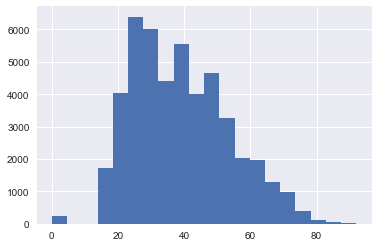

In [17]:
df['AGE'].hist(bins=20)
print df['AGE'].mean()
print df['AGE'].median()


41.5056055872
41.0


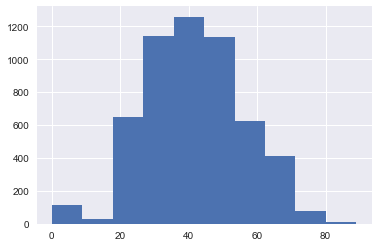

In [18]:
df[df['ISPREMIER']==1]['AGE'].hist()
print df[df['ISPREMIER']==1]['AGE'].mean()
print df[df['ISPREMIER']==1]['AGE'].median()


38.4690488173
37.0


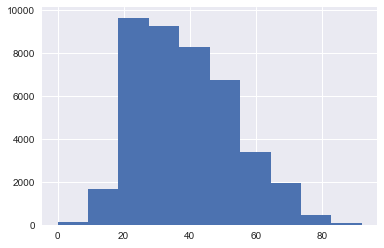

In [19]:
df[df['ISPREMIER']==0]['AGE'].hist()
print df[df['ISPREMIER']==0]['AGE'].mean()
print df[df['ISPREMIER']==0]['AGE'].median()


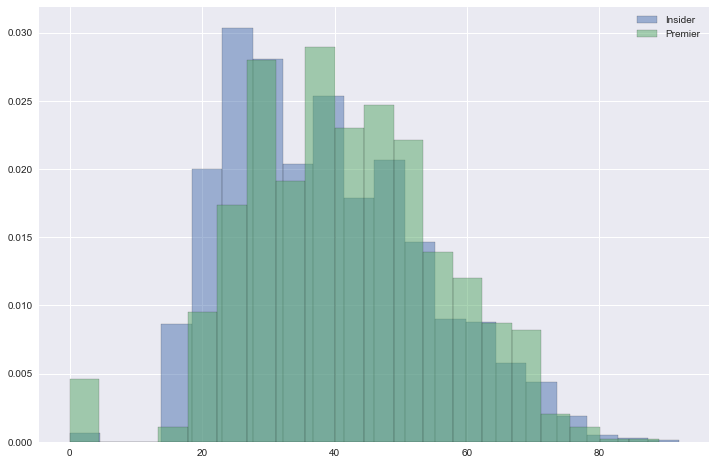

In [20]:
a1=df[df['ISPREMIER']==1]['AGE']
a2=df[df['ISPREMIER']==0]['AGE']

bins = np.linspace(-10, 10, 100)
plt.figure(figsize=(12,8))
plt.hist(a2, bins=20, alpha=0.5, label='Insider',normed=1,edgecolor='black' )
plt.hist(a1, bins=20, alpha=0.5, label='Premier',normed=1,edgecolor='black' )
plt.legend(loc='upper right')
plt.show()


<a id='V2'></a>
#### Bar plot: Online Fees Waived Amount vs. Estimated Income Range 


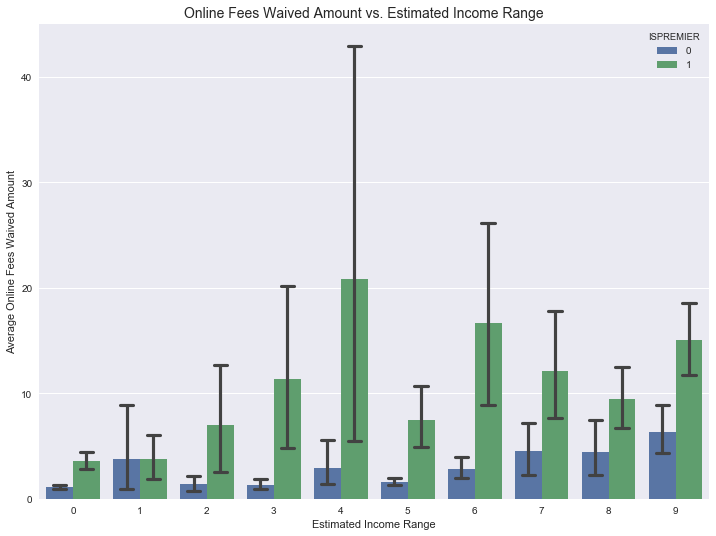

In [21]:
plt.figure(figsize=(12,8))

ax = sns.barplot(x="EST_INC_RNG", y="OL_FEE_WAIVE_AMT", data=df,hue='ISPREMIER',capsize=.2)
#ax.set_yscale('log')

plt.xlabel('Estimated Income Range')
plt.ylabel('Average Online Fees Waived Amount')
plt.subplots_adjust(top=0.95)
plt.suptitle('Online Fees Waived Amount vs. Estimated Income Range', fontsize=14)

plt.show()

#### Bar plot: Online Fees Waived Amount vs. Estimated Home Value Range 

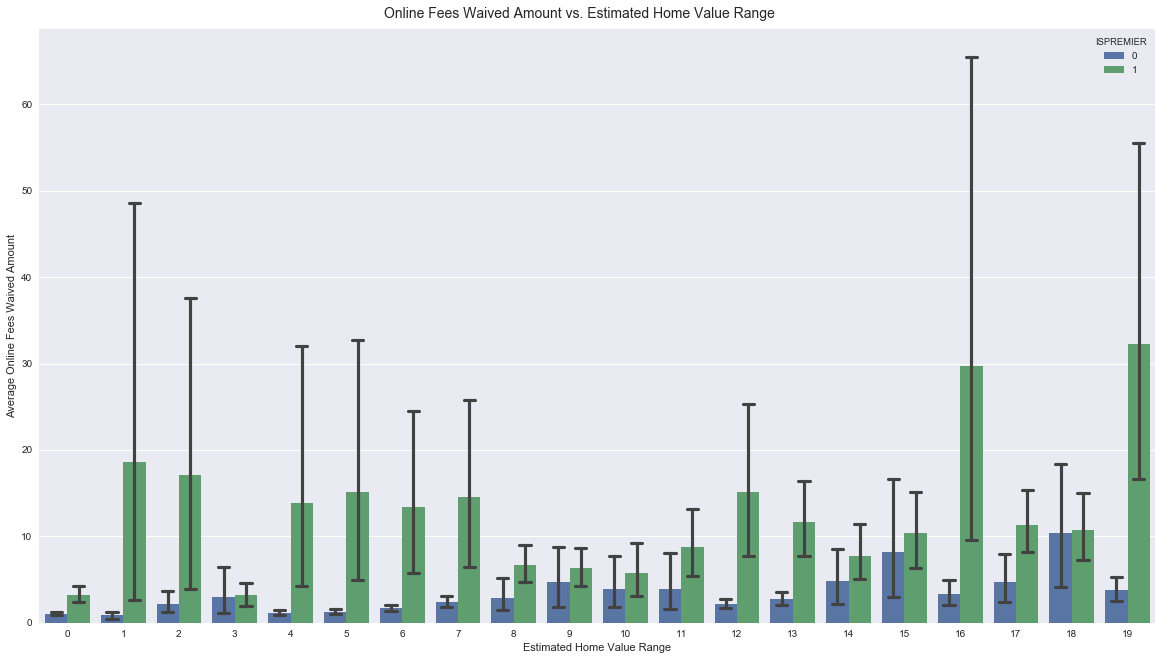

In [22]:
plt.figure(figsize=(20,10))

ax = sns.barplot(x="EST_HOME_VAL_RNG", y="OL_FEE_WAIVE_AMT", data=df,hue='ISPREMIER',capsize=.2)

plt.xlabel('Estimated Home Value Range')
plt.ylabel('Average Online Fees Waived Amount')
plt.subplots_adjust(top=0.95)
plt.suptitle('Online Fees Waived Amount vs. Estimated Home Value Range', fontsize=14)

plt.show()

#### Bar plot: Average Lifetime Awards Amount vs. Estimated Income Range

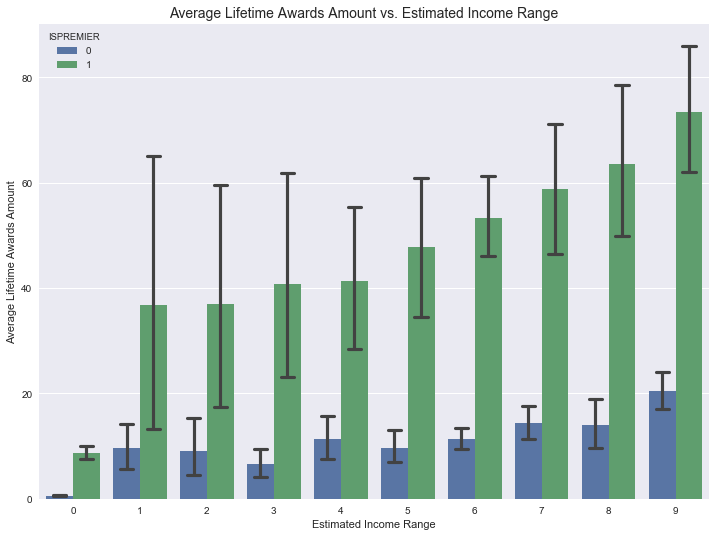

In [23]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="EST_INC_RNG", y="LIFE_AWARD_AMT", data=df,hue='ISPREMIER',capsize=.2)
plt.xlabel('Estimated Income Range')
plt.ylabel('Average Lifetime Awards Amount')
plt.subplots_adjust(top=0.95)
plt.suptitle('Average Lifetime Awards Amount vs. Estimated Income Range', fontsize=14)

plt.show()

#### Average Lifetime Awards Amount vs. Estimated Home Value Range

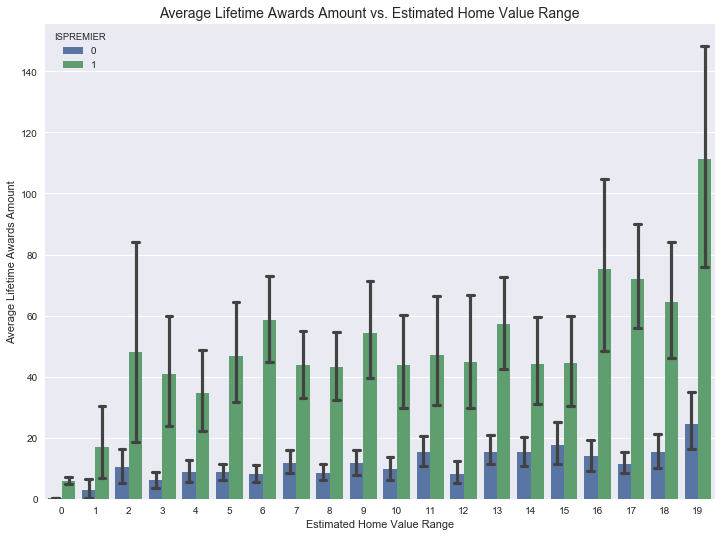

In [24]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="EST_HOME_VAL_RNG", y="LIFE_AWARD_AMT", data=df,hue='ISPREMIER',capsize=.2)
plt.xlabel('Estimated Home Value Range')
plt.ylabel('Average Lifetime Awards Amount')
plt.subplots_adjust(top=0.95)
plt.suptitle('Average Lifetime Awards Amount vs. Estimated Home Value Range', fontsize=14)

plt.show()

#### Bar plot: Average Lifetime Spend Amount vs. Estimated Income Range

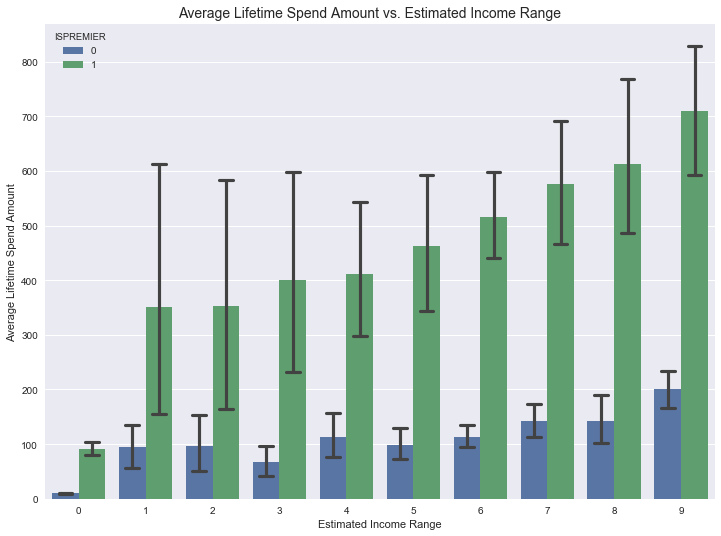

In [25]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="EST_INC_RNG", y="LIFE_SPEND_AMT", data=df,hue='ISPREMIER',capsize=.2)
plt.xlabel('Estimated Income Range')
plt.ylabel('Average Lifetime Spend Amount')
plt.subplots_adjust(top=0.95)
plt.suptitle('Average Lifetime Spend Amount vs. Estimated Income Range', fontsize=14)

plt.show()

#### Bar plot: Average Lifetime Spend Amount vs. Estimated Home Value Range

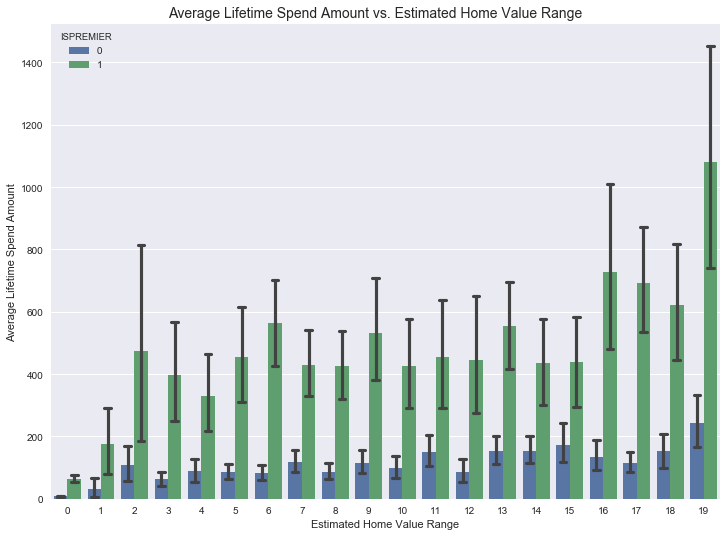

In [26]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="EST_HOME_VAL_RNG", y="LIFE_SPEND_AMT", data=df,hue='ISPREMIER',capsize=.2)
plt.xlabel('Estimated Home Value Range')
plt.ylabel('Average Lifetime Spend Amount')
plt.subplots_adjust(top=0.95)
plt.suptitle('Average Lifetime Spend Amount vs. Estimated Home Value Range', fontsize=14)

plt.show()

<a id='V7'></a>
#### Stacked Bar Chart and t-test : % Membership By Loyalty Email Offer Opt-In


[]

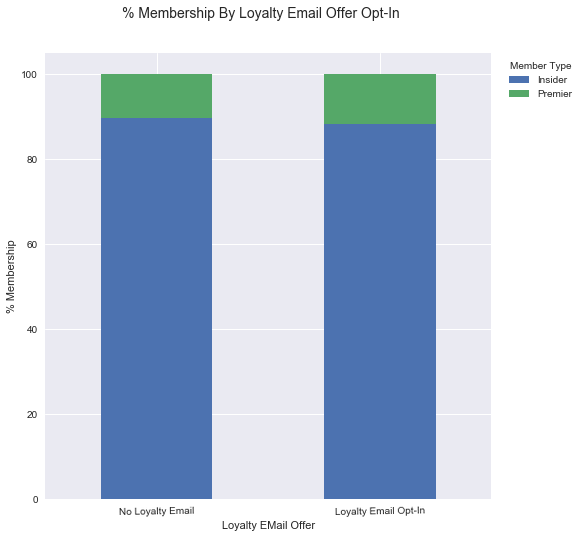

In [27]:
# Stacked bar chart of % Membership By Loyalty Email Offer Opt-In

# Groupby 'LOYALTY_EMAIL_OFFER','ISPREMIER', get a count for each and then use unstack() function
# to get a resultant dataframe suitable for plotting
sub_df = df.groupby(['LOYALTY_EMAIL_OFFER','ISPREMIER'])['ISPREMIER'].count().unstack()

sub_df2 = df.groupby(['LOYALTY_EMAIL_OFFER','ISPREMIER'])['ISPREMIER'].count()

sub_df_pct = sub_df2.groupby(level=0).apply(lambda x: 100*x / (x.sum())).unstack()

# Assign plot to a variable
sbc = sub_df_pct.plot(kind='bar',stacked=True,rot=1,figsize=(8,8))
# Define x,y labels
plt.xlabel('Loyalty EMail Offer')
plt.ylabel('% Membership')

# Adjust top of plot to fit title and set title
sbc.figure.subplots_adjust(top=0.90)
sbc.figure.suptitle('% Membership By Loyalty Email Offer Opt-In', fontsize=14)
sbc.legend(["Insider","Premier"],bbox_to_anchor=(1.2, 1.0),title='Member Type')
plt.xticks([0, 1], ['No Loyalty Email', 'Loyalty Email Opt-In'])
sbc.plot()

In [28]:
# Define groups on which we want to run t-test
noPrem_loyal_email = df[df['ISPREMIER'] == 0]['LOYALTY_EMAIL_OFFER']
Premloyal_email = df[df['ISPREMIER'] == 1]['LOYALTY_EMAIL_OFFER']

# Run t-test
stats.ttest_ind(noPrem_loyal_email, Premloyal_email)

Ttest_indResult(statistic=-3.8381459572211116, pvalue=0.0001241283980848804)

In [29]:
print "Premier - Loyalty Email: mean= %.3f , std deviation=%.3f " % \
(Premloyal_email.mean(), Premloyal_email.std(ddof=1))
print "Not Premier - Loyalty Email: mean= %.3f , std deviation=%.3f " % \
(noPrem_loyal_email.mean(), noPrem_loyal_email.std(ddof=1))

Premier - Loyalty Email: mean= 0.836 , std deviation=0.371 
Not Premier - Loyalty Email: mean= 0.814 , std deviation=0.389 


Comparing average **LOYALTY_EMAIL_OFFER** between Insider and Premier members:
* It is difficult to see from the stacked bar chart whether Premier member opt-in for the loayalty email offers.
* The t-test of **LOYALTY_EMAIL_OFFER** produced a p-value that was very small.  If we are using a significance level of 0.01 then this p-value would indicate that the groups are statistically different with respect to **LOYALTY_EMAIL_OFFER**.
* The slightly higher mean of LOYALTY_EMAIL_OFFER for Premier members indicates that a larger proportion of Premier members opt-in for loyalty email offers.

<br>
<br>


<a id='V7'></a>
#### Stacked Bar Chart and t-test : % Membership By Reward Email Opt-In


[]

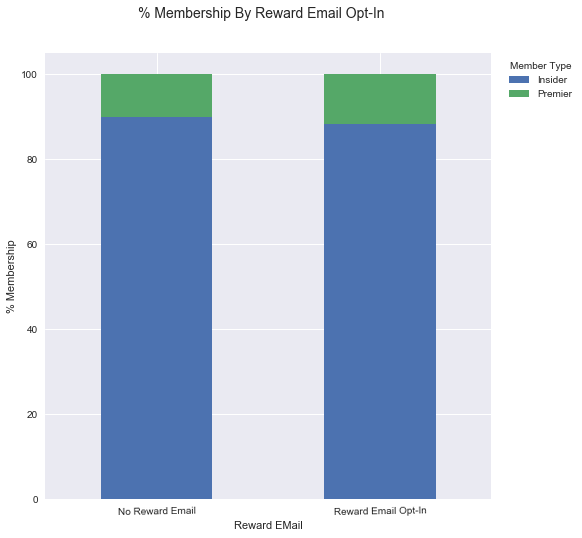

In [30]:
# Stacked bar chart of % Membership By Reward Email Opt-In

# Groupby 'REWARD_EMAIL','ISPREMIER', get a count for each and then use unstack() function
# to get a resultant dataframe suitable for plotting
sub_df = df.groupby(['REWARD_EMAIL','ISPREMIER'])['ISPREMIER'].count().unstack()

sub_df2 = df.groupby(['REWARD_EMAIL','ISPREMIER'])['ISPREMIER'].count()

sub_df_pct = sub_df2.groupby(level=0).apply(lambda x: 100*x / (x.sum())).unstack()

# Assign plot to a variable
sbc = sub_df_pct.plot(kind='bar',stacked=True,rot=1,figsize=(8,8))
# Define x,y labels
plt.xlabel('Reward EMail')
plt.ylabel('% Membership')

# Adjust top of plot to fit title and set title
sbc.figure.subplots_adjust(top=0.90)
sbc.figure.suptitle('% Membership By Reward Email Opt-In', fontsize=14)
sbc.legend(["Insider","Premier"],bbox_to_anchor=(1.2, 1.0),title='Member Type')
plt.xticks([0, 1], ['No Reward Email', 'Reward Email Opt-In'])
sbc.plot()

In [31]:
# Define groups on which we want to run t-test
noPrem_reward_email = df[df['ISPREMIER'] == 0]['REWARD_EMAIL']
Prem_reward_email = df[df['ISPREMIER'] == 1]['REWARD_EMAIL']

# Run t-test
stats.ttest_ind(noPrem_reward_email, Prem_reward_email)

Ttest_indResult(statistic=-3.6772149323092735, pvalue=0.00023605599689935098)

In [32]:
print "Premier - Reward Email: mean= %.3f , std deviation=%.3f " % \
(Prem_reward_email.mean(), Prem_reward_email.std(ddof=1))
print "Not Premier - Reward Email: mean= %.3f , std deviation=%.3f " % \
(noPrem_reward_email.mean(), noPrem_reward_email.std(ddof=1))

Premier - Reward Email: mean= 0.875 , std deviation=0.330 
Not Premier - Reward Email: mean= 0.857 , std deviation=0.350 


Comparing average **REWARD_EMAIL** between Insider and Premier members:
* It is difficult to see from the stacked bar chart whether Premier member opt-in for the reward email offers.
* The t-test of **REWARD_EMAIL** produced a p-value that was very small.  If we are using a significance level of 0.01 then this p-value would indicate that the groups are statistically different with respect to **REWARD_EMAIL**.
* The slightly higher mean of REWARD_EMAIL for Premier members indicates that a larger proportion of Premier members opt-in for rewards email offers.

<br>
<br>


<a id='V7'></a>
#### Stacked Bar Chart and t-test : % Membership By Reward Mobile Opt-In


[]

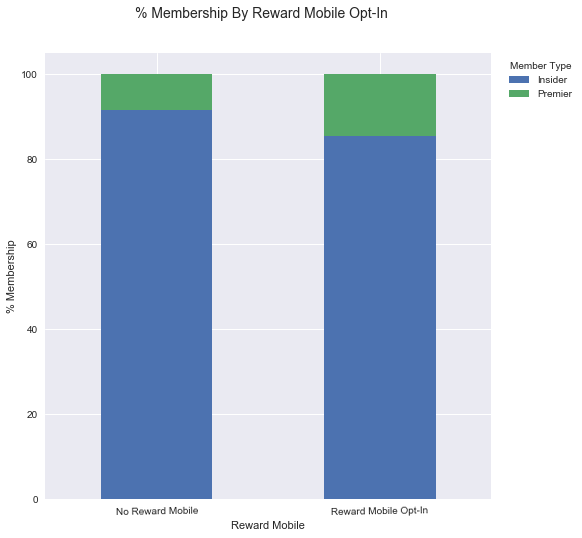

In [33]:
# Stacked bar chart of % Membership By Reward Mobile Opt-In

# Groupby 'REWARD_MOBILE','ISPREMIER', get a count for each and then use unstack() function
# to get a resultant dataframe suitable for plotting
sub_df = df.groupby(['REWARD_MOBILE','ISPREMIER'])['ISPREMIER'].count().unstack()

sub_df2 = df.groupby(['REWARD_MOBILE','ISPREMIER'])['ISPREMIER'].count()

sub_df_pct = sub_df2.groupby(level=0).apply(lambda x: 100*x / (x.sum())).unstack()

# Assign plot to a variable
sbc = sub_df_pct.plot(kind='bar',stacked=True,rot=1,figsize=(8,8))
# Define x,y labels
plt.xlabel('Reward Mobile')
plt.ylabel('% Membership')

# Adjust top of plot to fit title and set title
sbc.figure.subplots_adjust(top=0.90)
sbc.figure.suptitle('% Membership By Reward Mobile Opt-In', fontsize=14)
sbc.legend(["Insider","Premier"],bbox_to_anchor=(1.2, 1.0),title='Member Type')
plt.xticks([0, 1], ['No Reward Mobile', 'Reward Mobile Opt-In'])
sbc.plot()

In [34]:
# Define groups on which we want to run t-test
noPrem_REWARD_MOBILE = df[df['ISPREMIER'] == 0]['REWARD_MOBILE']
Prem_REWARD_MOBILE = df[df['ISPREMIER'] == 1]['REWARD_MOBILE']

# Run t-test
stats.ttest_ind(noPrem_REWARD_MOBILE, Prem_REWARD_MOBILE)

Ttest_indResult(statistic=-20.994037500621246, pvalue=2.0784046934705166e-97)

In [35]:
print "Premier - Reward Mobile: mean= %.3f , std deviation=%.3f " % \
(Prem_REWARD_MOBILE.mean(), Prem_REWARD_MOBILE.std(ddof=1))
print "Not Premier - Reward Mobile: mean= %.3f , std deviation=%.3f " % \
(noPrem_REWARD_MOBILE.mean(), noPrem_REWARD_MOBILE.std(ddof=1))

Premier - Reward Mobile: mean= 0.636 , std deviation=0.481 
Not Premier - Reward Mobile: mean= 0.486 , std deviation=0.500 


Comparing average **REWARD_MOBILE** between Insider and Premier members:
* The stacked bar chart indicates that for the members who opt-in for mobile rewards, the percentage of Premier members is higher than Premier members who do not opt-in for mobile rewards.
* The t-test of **REWARD_MOBILE** produced a p-value that was very small.  If we are using a significance level of 0.01 then this p-value would indicate that the groups are statistically different with respect to **REWARD_MOBILE**.
* The slightly higher mean of REWARD_MOBILE for Premier members indicates that a larger proportion of Premier members opt-in for rewards mobile offers.

<br>
<br>


<a id='V7'></a>
#### Stacked Bar Chart and t-test : % Membership By Reward SMS Opt-In


[]

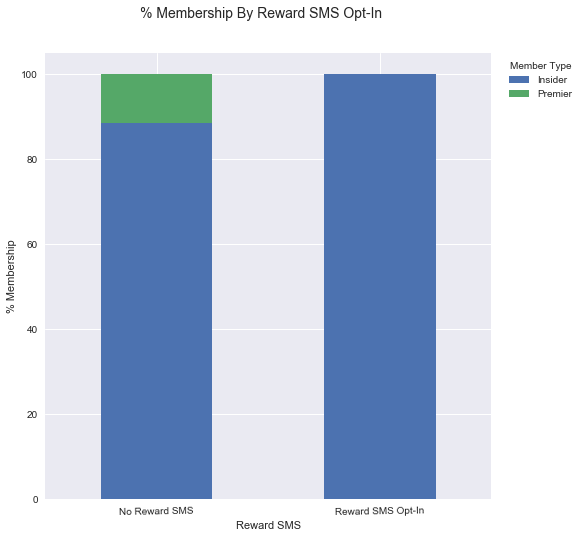

In [36]:
# Stacked bar chart of % Membership By Reward SMS Opt-In

# Groupby 'REWARD_SMS','ISPREMIER', get a count for each and then use unstack() function
# to get a resultant dataframe suitable for plotting
sub_df = df.groupby(['REWARD_SMS','ISPREMIER'])['ISPREMIER'].count().unstack()

sub_df2 = df.groupby(['REWARD_SMS','ISPREMIER'])['ISPREMIER'].count()

sub_df_pct = sub_df2.groupby(level=0).apply(lambda x: 100*x / (x.sum())).unstack()

# Assign plot to a variable
sbc = sub_df_pct.plot(kind='bar',stacked=True,rot=1,figsize=(8,8))
# Define x,y labels
plt.xlabel('Reward SMS')
plt.ylabel('% Membership')

# Adjust top of plot to fit title and set title
sbc.figure.subplots_adjust(top=0.90)
sbc.figure.suptitle('% Membership By Reward SMS Opt-In', fontsize=14)
sbc.legend(["Insider","Premier"],bbox_to_anchor=(1.2, 1.0),title='Member Type')
plt.xticks([0, 1], ['No Reward SMS', 'Reward SMS Opt-In'])
sbc.plot()

In [37]:
# Define groups on which we want to run t-test
noPrem_REWARD_SMS = df[df['ISPREMIER'] == 0]['REWARD_SMS']
Prem_REWARD_SMS = df[df['ISPREMIER'] == 1]['REWARD_SMS']

# Run t-test
stats.ttest_ind(noPrem_REWARD_SMS, Prem_REWARD_SMS)

Ttest_indResult(statistic=0.51067780205042257, pvalue=0.6095790768539624)

In [38]:
print "Premier - Reward SMS: mean= %.3f , std deviation=%.3f " % \
(Prem_REWARD_SMS.mean(), Prem_REWARD_SMS.std(ddof=1))
print "Not Premier - Reward SMS: mean= %.3f , std deviation=%.3f " % \
(noPrem_REWARD_SMS.mean(), noPrem_REWARD_SMS.std(ddof=1))

Premier - Reward SMS: mean= 0.000 , std deviation=0.000 
Not Premier - Reward SMS: mean= 0.000 , std deviation=0.007 


Comparing average **REWARD_SMS** between Insider and Premier members:
* The stacked bar chart indicates that for the members who opt-in for rewards SMS message, the percentage of Premier members is essentially zero.  It appears that the rewards SMS messages is not widely used by Insider or Premier members.  There were only 2 Insider members out of 47,168 total members who signed up to receive SMS message.
* The t-test of **REWARD_SMS** produced a high p-value indicating that there is no statistically significant difference between Premiear and Insider members who opted in to receive SMS messages.

<br>
<br>


<a id='V7'></a>
#### Stacked Bar Chart and t-test : % Membership By Theater Mobile Opt-In


[]

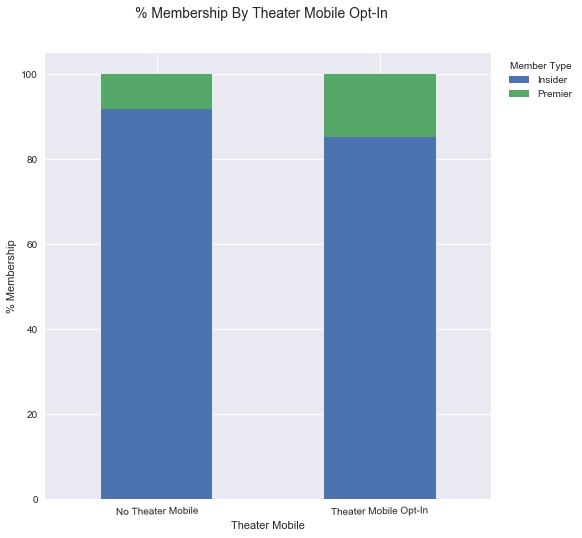

In [39]:
# Stacked bar chart of % Membership By Theater Mobile Opt-In

# Groupby 'THEATR_MOB_OFFER','ISPREMIER', get a count for each and then use unstack() function
# to get a resultant dataframe suitable for plotting
sub_df = df.groupby(['THEATR_MOB_OFFER','ISPREMIER'])['ISPREMIER'].count().unstack()

sub_df2 = df.groupby(['THEATR_MOB_OFFER','ISPREMIER'])['ISPREMIER'].count()

sub_df_pct = sub_df2.groupby(level=0).apply(lambda x: 100*x / (x.sum())).unstack()

# Assign plot to a variable
sbc = sub_df_pct.plot(kind='bar',stacked=True,rot=1,figsize=(8,8))
# Define x,y labels
plt.xlabel('Theater Mobile')
plt.ylabel('% Membership')

# Adjust top of plot to fit title and set title
sbc.figure.subplots_adjust(top=0.90)
sbc.figure.suptitle('% Membership By Theater Mobile Opt-In', fontsize=14)
sbc.legend(["Insider","Premier"],bbox_to_anchor=(1.2, 1.0),title='Member Type')
plt.xticks([0, 1], ['No Theater Mobile', 'Theater Mobile Opt-In'])
sbc.plot()

In [40]:
# Define groups on which we want to run t-test
noPrem_THEATR_MOB_OFFER = df[df['ISPREMIER'] == 0]['THEATR_MOB_OFFER']
Prem_THEATR_MOB_OFFER = df[df['ISPREMIER'] == 1]['THEATR_MOB_OFFER']

# Run t-test
stats.ttest_ind(noPrem_THEATR_MOB_OFFER, Prem_THEATR_MOB_OFFER)

Ttest_indResult(statistic=-22.22212974904037, pvalue=7.6154155835212037e-109)

In [41]:
print "Premier - Theater Mobile: mean= %.3f , std deviation=%.3f " % \
(Prem_THEATR_MOB_OFFER.mean(), Prem_THEATR_MOB_OFFER.std(ddof=1))
print "Not Premier - Theater Mobile: mean= %.3f , std deviation=%.3f " % \
(noPrem_THEATR_MOB_OFFER.mean(), noPrem_THEATR_MOB_OFFER.std(ddof=1))

Premier - Theater Mobile: mean= 0.649 , std deviation=0.477 
Not Premier - Theater Mobile: mean= 0.490 , std deviation=0.500 


Comparing average **THEATR_MOB_OFFER** between Insider and Premier members:
* The stacked bar chart indicates that for the members who opt-in for theater mobile offers, the percentage of Premier members is higher than Premier members who do not opt-in for theater mobile offers.
* The t-test of **THEATR_MOB_OFFER** produced a p-value that was very small.  If we are using a significance level of 0.01 then this p-value would indicate that the groups are statistically different with respect to **THEATR_MOB_OFFER**.
* The slightly higher mean of THEATR_MOB_OFFER for Premier members indicates that a larger proportion of Premier members opt-in for rewards mobile offers.

<br>
<br>


<a id='V7'></a>
#### Stacked Bar Chart and t-test : % Membership By Theater SMS Opt-In


[]

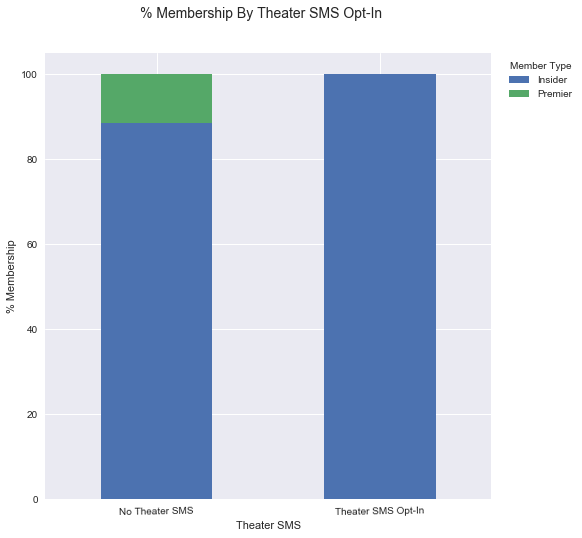

In [42]:
# Stacked bar chart of % Membership By Theater SMS Opt-In

# Groupby 'THEATR_SMS_OFFER','ISPREMIER', get a count for each and then use unstack() function
# to get a resultant dataframe suitable for plotting
sub_df = df.groupby(['THEATR_SMS_OFFER','ISPREMIER'])['ISPREMIER'].count().unstack()

sub_df2 = df.groupby(['THEATR_SMS_OFFER','ISPREMIER'])['ISPREMIER'].count()

sub_df_pct = sub_df2.groupby(level=0).apply(lambda x: 100*x / (x.sum())).unstack()

# Assign plot to a variable
sbc = sub_df_pct.plot(kind='bar',stacked=True,rot=1,figsize=(8,8))
# Define x,y labels
plt.xlabel('Theater SMS')
plt.ylabel('% Membership')

# Adjust top of plot to fit title and set title
sbc.figure.subplots_adjust(top=0.90)
sbc.figure.suptitle('% Membership By Theater SMS Opt-In', fontsize=14)
sbc.legend(["Insider","Premier"],bbox_to_anchor=(1.2, 1.0),title='Member Type')
plt.xticks([0, 1], ['No Theater SMS', 'Theater SMS Opt-In'])
sbc.plot()

In [43]:
# Define groups on which we want to run t-test
noPrem_THEATR_SMS_OFFER = df[df['ISPREMIER'] == 0]['THEATR_SMS_OFFER']
Prem_THEATR_SMS_OFFER = df[df['ISPREMIER'] == 1]['THEATR_SMS_OFFER']

# Run t-test
stats.ttest_ind(noPrem_THEATR_SMS_OFFER, Prem_THEATR_SMS_OFFER)

Ttest_indResult(statistic=0.51067780205042257, pvalue=0.6095790768539624)

In [44]:
print "Premier - Theater SMS: mean= %.3f , std deviation=%.3f " % \
(Prem_THEATR_SMS_OFFER.mean(), Prem_THEATR_SMS_OFFER.std(ddof=1))
print "Not Premier - Theater SMS: mean= %.3f , std deviation=%.3f " % \
(noPrem_THEATR_SMS_OFFER.mean(), noPrem_THEATR_SMS_OFFER.std(ddof=1))

Premier - Theater SMS: mean= 0.000 , std deviation=0.000 
Not Premier - Theater SMS: mean= 0.000 , std deviation=0.007 


Comparing average **THEATR_SMS_OFFER** between Insider and Premier members:
* The stacked bar chart indicates that for the members who opt-in for theater SMS offer message, the percentage of Premier members is essentially zero.  It appears that the theater SMS offer messages is not widely used by Insider or Premier members.  There were only 2 Insider members out of 47,168 total members who signed up to receive theater SMS offer messages.
* The t-test of **THEATR_SMS_OFFER** produced a high p-value indicating that there is no statistically significant difference between Premiear and Insider members who opted in to receive SMS messages for theater offers.


<br>
<br>


<a id='V7'></a>
#### Stacked Bar Chart and t-test : % Membership By Frequently Visited Theater Selected


[]

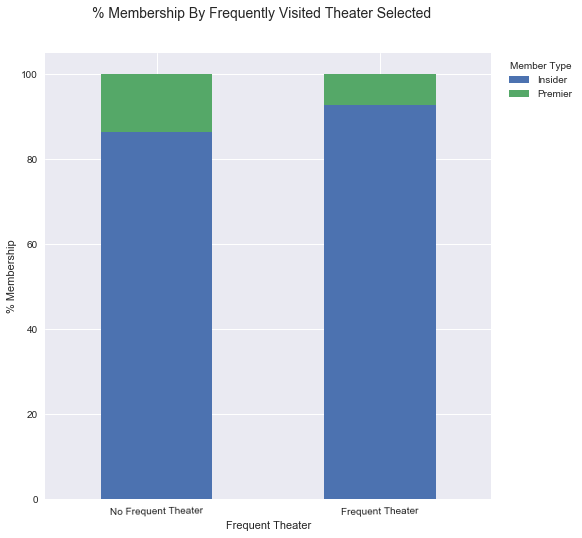

In [45]:
# Stacked bar chart of % Membership By Frequently Visited Theater Selected

# Groupby 'FREQ_THEATRE','ISPREMIER', get a count for each and then use unstack() function
# to get a resultant dataframe suitable for plotting
sub_df = df.groupby(['FREQ_THEATRE','ISPREMIER'])['ISPREMIER'].count().unstack()

sub_df2 = df.groupby(['FREQ_THEATRE','ISPREMIER'])['ISPREMIER'].count()

sub_df_pct = sub_df2.groupby(level=0).apply(lambda x: 100*x / (x.sum())).unstack()

# Assign plot to a variable
sbc = sub_df_pct.plot(kind='bar',stacked=True,rot=1,figsize=(8,8))
# Define x,y labels
plt.xlabel('Frequent Theater')
plt.ylabel('% Membership')

# Adjust top of plot to fit title and set title
sbc.figure.subplots_adjust(top=0.90)
sbc.figure.suptitle('% Membership By Frequently Visited Theater Selected', fontsize=14)
sbc.legend(["Insider","Premier"],bbox_to_anchor=(1.2, 1.0),title='Member Type')
plt.xticks([0, 1], ['No Frequent Theater', 'Frequent Theater'])
sbc.plot()

In [46]:
# Define groups on which we want to run t-test
noPrem_FREQ_THEATRE = df[df['ISPREMIER'] == 0]['FREQ_THEATRE']
Prem_FREQ_THEATRE = df[df['ISPREMIER'] == 1]['FREQ_THEATRE']

# Run t-test
stats.ttest_ind(noPrem_FREQ_THEATRE, Prem_FREQ_THEATRE)

Ttest_indResult(statistic=20.937634064708355, pvalue=6.7253236834249428e-97)

In [47]:
print "Premier - Frequently Visited Theater Selected: mean= %.3f , std deviation=%.3f " % \
(Prem_FREQ_THEATRE.mean(), Prem_FREQ_THEATRE.std(ddof=1))
print "Not Premier - Frequently Visited Theater Selected: mean= %.3f , std deviation=%.3f " % \
(noPrem_FREQ_THEATRE.mean(), noPrem_FREQ_THEATRE.std(ddof=1))

Premier - Frequently Visited Theater Selected: mean= 0.217 , std deviation=0.412 
Not Premier - Frequently Visited Theater Selected: mean= 0.360 , std deviation=0.480 


Comparing average **FREQ_THEATRE** between Insider and Premier members:
* The stacked bar chart indicates that for the members who have selected a frequently visited theater number, the percentage of Premier members is lower than Premier members who do not select a frequently visited theater number.
* The t-test of **FREQ_THEATRE** produced a p-value that was very small.  If we are using a significance level of 0.01 then this p-value would indicate that the groups are statistically different with respect to **FREQ_THEATRE**.
* The lower mean of FREQ_THEATRE for Premier members indicates that a smaller proportion of Premier members select a frequently visited theater number.

<br>
<br>


<a id='V7'></a>
#### Stacked Bar Chart: % Membership By Gender


[]

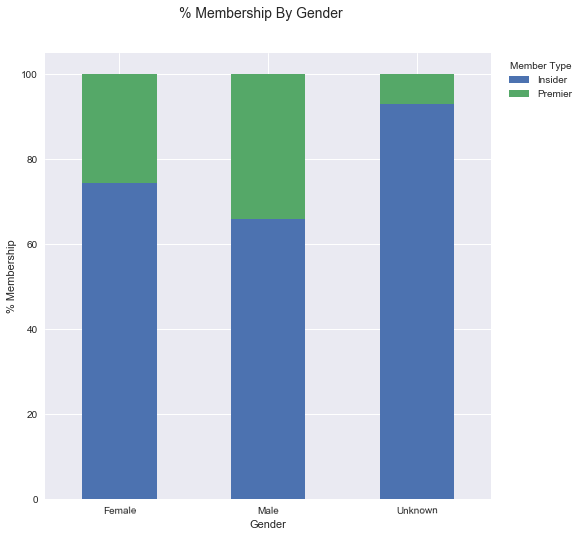

In [48]:
# Stacked bar chart of % Membership By Gender

# Groupby 'GENDERCODE','ISPREMIER', get a count for each and then use unstack() function
# to get a resultant dataframe suitable for plotting
sub_df = df.groupby(['GENDERCODE','ISPREMIER'])['ISPREMIER'].count().unstack()

sub_df2 = df.groupby(['GENDERCODE','ISPREMIER'])['ISPREMIER'].count()

sub_df_pct = sub_df2.groupby(level=0).apply(lambda x: 100*x / (x.sum())).unstack()

# Assign plot to a variable
sbc = sub_df_pct.plot(kind='bar',stacked=True,rot=1,figsize=(8,8))
# Define x,y labels
plt.xlabel('Gender')
plt.ylabel('% Membership')

# Adjust top of plot to fit title and set title
sbc.figure.subplots_adjust(top=0.90)
sbc.figure.suptitle('% Membership By Gender', fontsize=14)
sbc.legend(["Insider","Premier"],bbox_to_anchor=(1.2, 1.0),title='Member Type')
plt.xticks([0, 1, 2], ['Female', 'Male','Unknown'])
sbc.plot()

Comparing average **GENDER** between Insider and Premier members:
* The stacked bar chart indicates that a larger percentage of males upgrade to the Premier membership, followed by females, and then the unknown gender category.

<br>
<br>


In [49]:
# Now drop GENDERCODE column since we shouldn't need it now
df = df.drop(['GENDERCODE'], axis=1)
df.head()


ISPREMIER  AGE21PLUS  AGE18TO21  AGE13TO18  LOYALTY_EMAIL_OFFER  \
0          1          1          0          0                    0   
1          1          1          0          0                    0   
2          1          1          0          0                    0   
3          0          1          0          0                    0   
4          1          1          0          0                    1   

   REWARD_EMAIL  REWARD_MOBILE  REWARD_SMS  THEATR_MOB_OFFER  \
0             0              0           0                 0   
1             0              1           0                 1   
2             0              0           0                 0   
3             1              1           0                 0   
4             1              1           0                 1   

   THEATR_SMS_OFFER  LIFE_AWARD_AMT  LIFE_SPEND_AMT  OL_FEE_WAIVE_AMT  \
0                 0           265.0         2706.45             61.25   
1                 0           215.0         2113.36            123.00   
2                 0           210.0         2141.80            182.50   
3                 0           170.0         1749.20             47.75   
4                 0           290.0         2822.35             45.00   

   EST_INC_RNG  EST_HOME_VAL_RNG  FREQ_THEATRE  TICKET_QTY  TICKET_BAL  \
0            0                 0             1          51      969.09   
1            3                13             0          40      842.00   
2            0                 0             1          49      675.66   
3            9                13             1          38      616.61   
4            8                 6             1          47      607.53   

   CONCQTYSUM  CONCLOYDISC  CONC_BAL  AGE  GENDER_0  GENDER_1  GENDER_3  \
0           7          0.0     41.71   41         0         0         1   
1           1         -1.0      7.49   34         0         1         0   
2           4          0.0     25.42   47         0         0         1   
3          72         -7.0    474.14   50         1         0         0   
4          10         -2.0     63.60   23         0         1         0   

   CHILD_0  CHILD_1  CHILD_3  UNK_INC  UNK_HOME  
0        0        0        1        1         1  
1        1        0        0        0         0  
2        0        0        1        1         1  
3        0        1        0        0         0  
4        0        0        1        0         0

<a id='V7'></a>
#### Stacked Bar Chart: % Membership By Estimated Income Range


[]

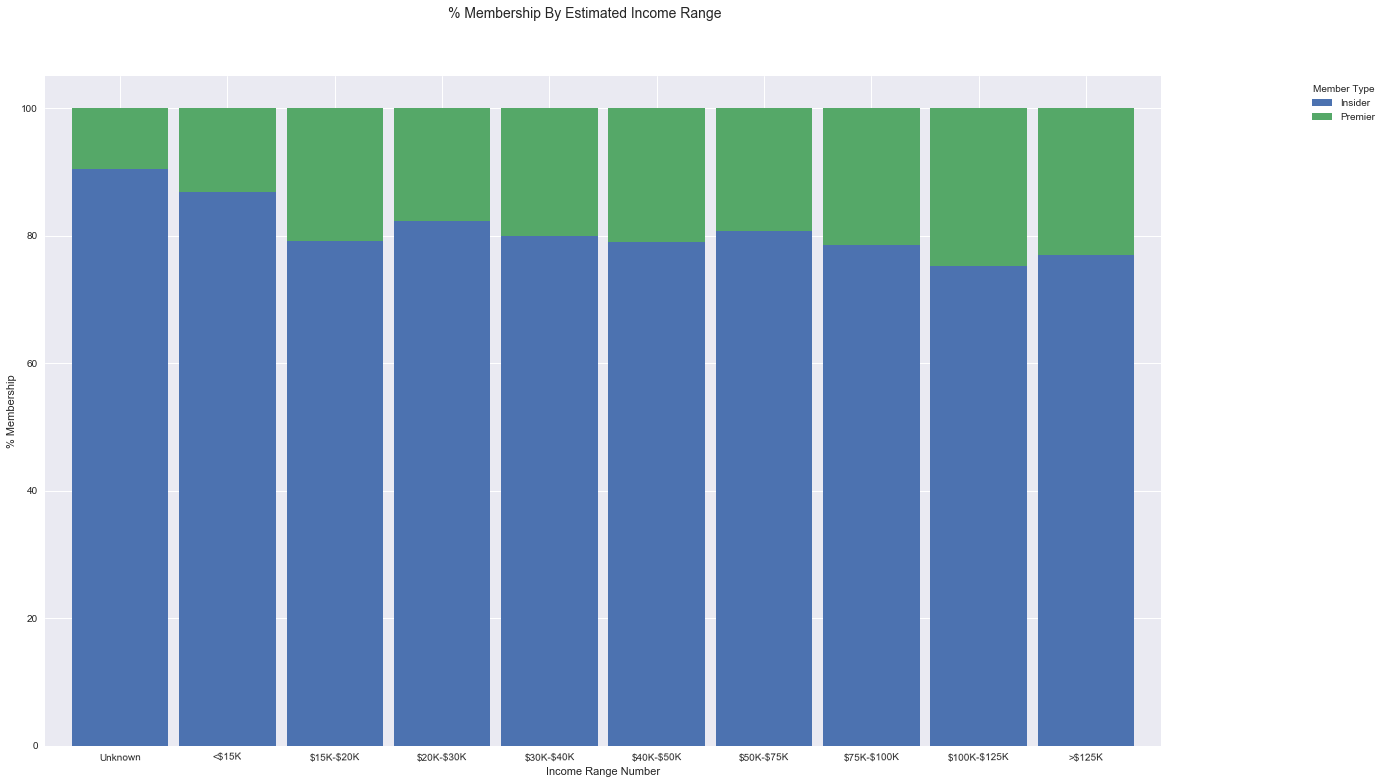

In [50]:
# Stacked bar chart of %Membership by Estimated Income Range

# Groupby 'promo_last_5','left', get a count for each and then use unstack() function
# to get a resultant dataframe suitable for plotting
sub_df = df.groupby(['EST_INC_RNG','ISPREMIER'])['ISPREMIER'].count().unstack()

sub_df2 = df.groupby(['EST_INC_RNG','ISPREMIER'])['ISPREMIER'].count()

sub_df_pct = sub_df2.groupby(level=0).apply(lambda x: 100*x / (x.sum())).unstack()

# Assign plot to a variable
sbc = sub_df_pct.plot(kind='bar',stacked=True,rot=1,figsize=(20,12),width=0.9)
# Define x,y labels
plt.xlabel('Income Range Number')
plt.ylabel('% Membership')

# Adjust top of plot to fit title and set title
sbc.figure.subplots_adjust(top=0.90)
sbc.figure.suptitle('% Membership By Estimated Income Range', fontsize=14)
sbc.legend(["Insider","Premier"],bbox_to_anchor=(1.2, 1.0),title='Member Type')
plt.xticks([0,1,2,3,4,5,6,7,8,9], ['Unknown','<\$15K', '\$15K-\$20K','\$20K-\$30K','\$30K-\$40K','\$40K-\$50K','\$50K-\$75K','\$75K-\$100K','\$100K-\$125K','>\$125K'])
sbc.plot()

Comparing average **EST_INC_RNG** between Insider and Premier members:
* The stacked bar chart indicates that as estimated income range increases, the percentage of members upgrading to the Premier membership increases.

<br>
<br>


<a id='V7'></a>
#### Stacked Bar Chart: % Membership By Estimated Home Value Range


[]

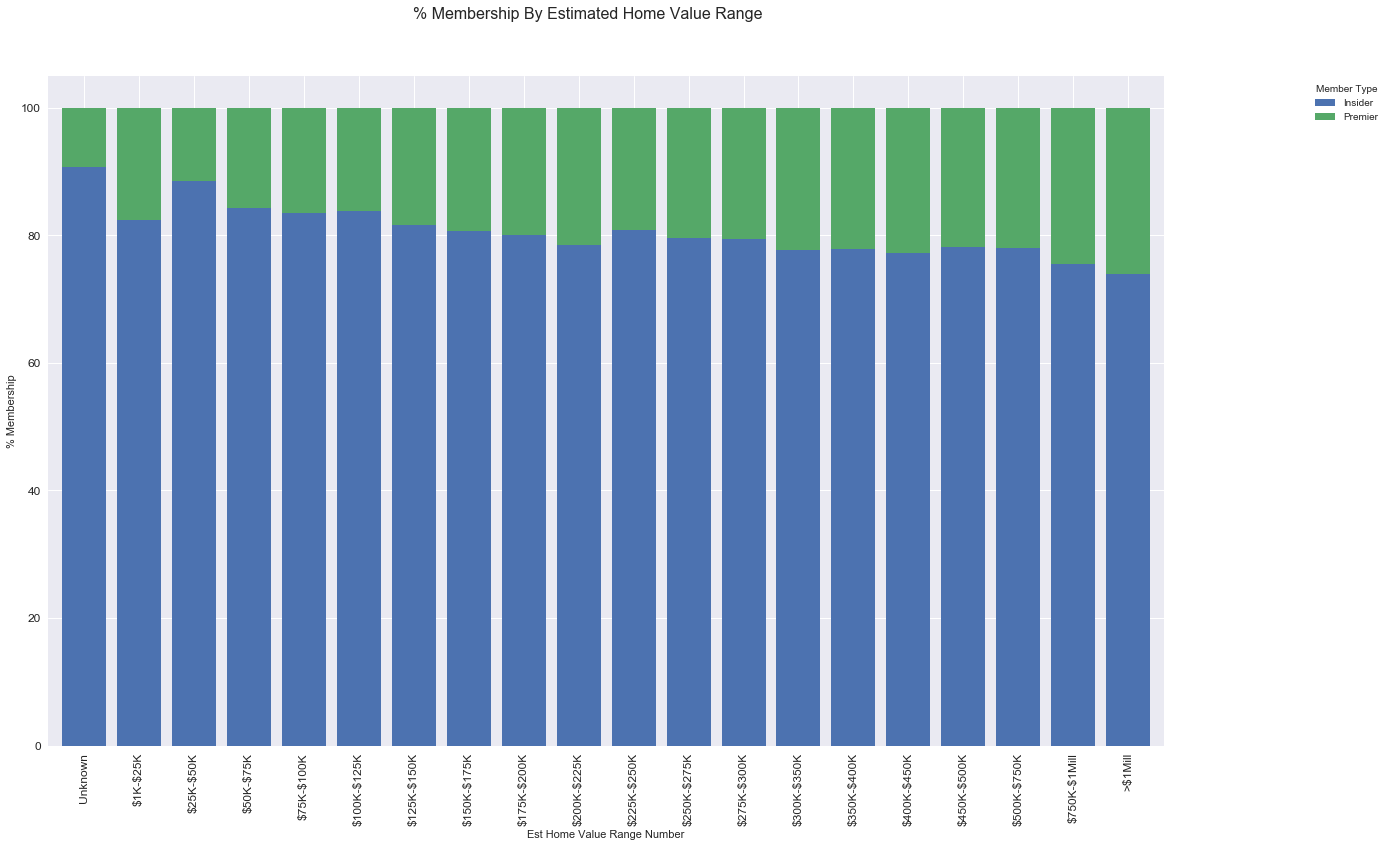

In [51]:
# Stacked bar chart of %Membership by Estimated Home Value Range

# Groupby 'promo_last_5','left', get a count for each and then use unstack() function
# to get a resultant dataframe suitable for plotting
sub_df = df.groupby(['EST_HOME_VAL_RNG','ISPREMIER'])['ISPREMIER'].count().unstack()

sub_df2 = df.groupby(['EST_HOME_VAL_RNG','ISPREMIER'])['ISPREMIER'].count()

sub_df_pct = sub_df2.groupby(level=0).apply(lambda x: 100*x / (x.sum())).unstack()

# Assign plot to a variable
sbc = sub_df_pct.plot(kind='bar',stacked=True,rot=90,figsize=(20,12),width=0.8,fontsize=12)
# Define x,y labels
plt.xlabel('Est Home Value Range Number')
plt.ylabel('% Membership')

# Adjust top of plot to fit title and set title
sbc.figure.subplots_adjust(top=0.90)
sbc.figure.suptitle('% Membership By Estimated Home Value Range', fontsize=16)
sbc.legend(["Insider","Premier"],bbox_to_anchor=(1.2, 1.0),title='Member Type')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], ['Unknown','\$1K-\$25K', '\$25K-\$50K','\$50K-\$75K','\$75K-\$100K','\$100K-\$125K','\$125K-\$150K','\$150K-\$175K','\$175K-\$200K','\$200K-\$225K',
                                  '\$225K-\$250K','\$250K-\$275K','\$275K-\$300K','\$300K-\$350K','\$350K-\$400K','\$400K-\$450K','\$450K-\$500K','\$500K-\$750K','\$750K-\$1Mill','>\$1Mill',])
sbc.plot()

Comparing average **EST_HOME_VAL_RNG** between Insider and Premier members:
* The stacked bar chart indicates that as estimated home value range increases, the percentage of members upgrading to the Premier membership increases.

<br>
<br>


### PairGrid Visualization

#### Since there are many continuous numerical variables, we have broken the PairGrid visualizations into two parts for clarity.


<a id='V14'></a>
### PairGrid Part 1.

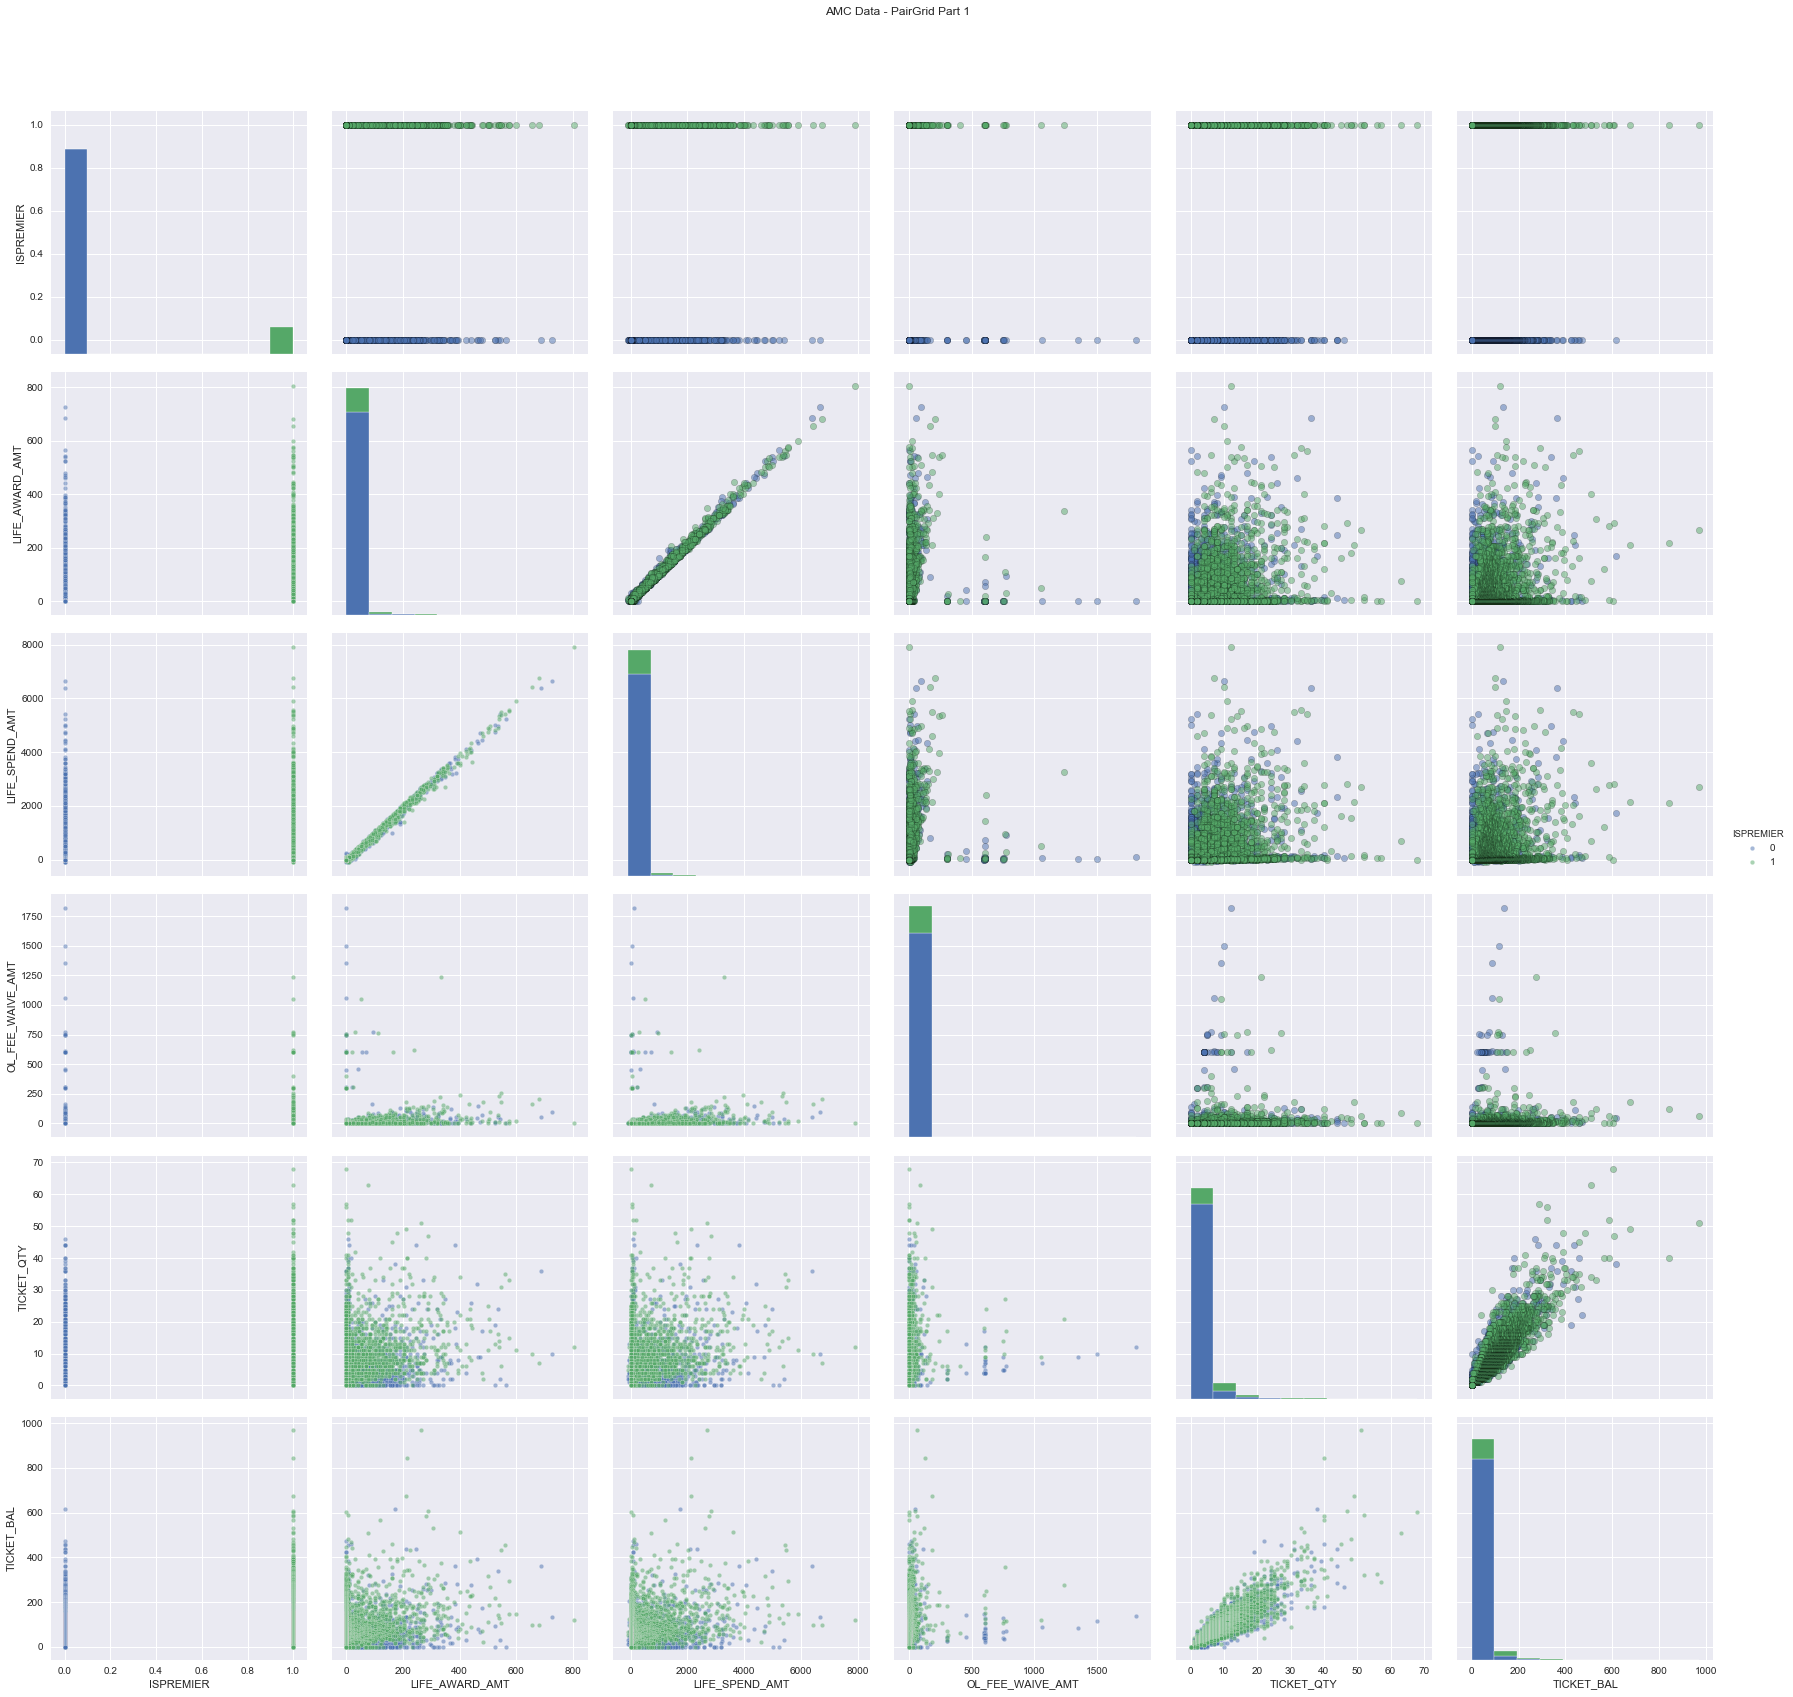

In [52]:
g=sns.PairGrid(df[['ISPREMIER','LIFE_AWARD_AMT','LIFE_SPEND_AMT','OL_FEE_WAIVE_AMT','TICKET_QTY','TICKET_BAL',]],hue='ISPREMIER',size=4)

g = g.map_upper(plt.scatter,edgecolor="k", s=40,alpha=.5 )
g = g.map_lower(plt.scatter,edgecolor="w", s=20,alpha=.5)
g = g.map_diag(plt.hist, edgecolor="w")
sns.plt.suptitle('AMC Data - PairGrid Part 1')
sns.plt.subplots_adjust(top=.92)
g = g.add_legend()


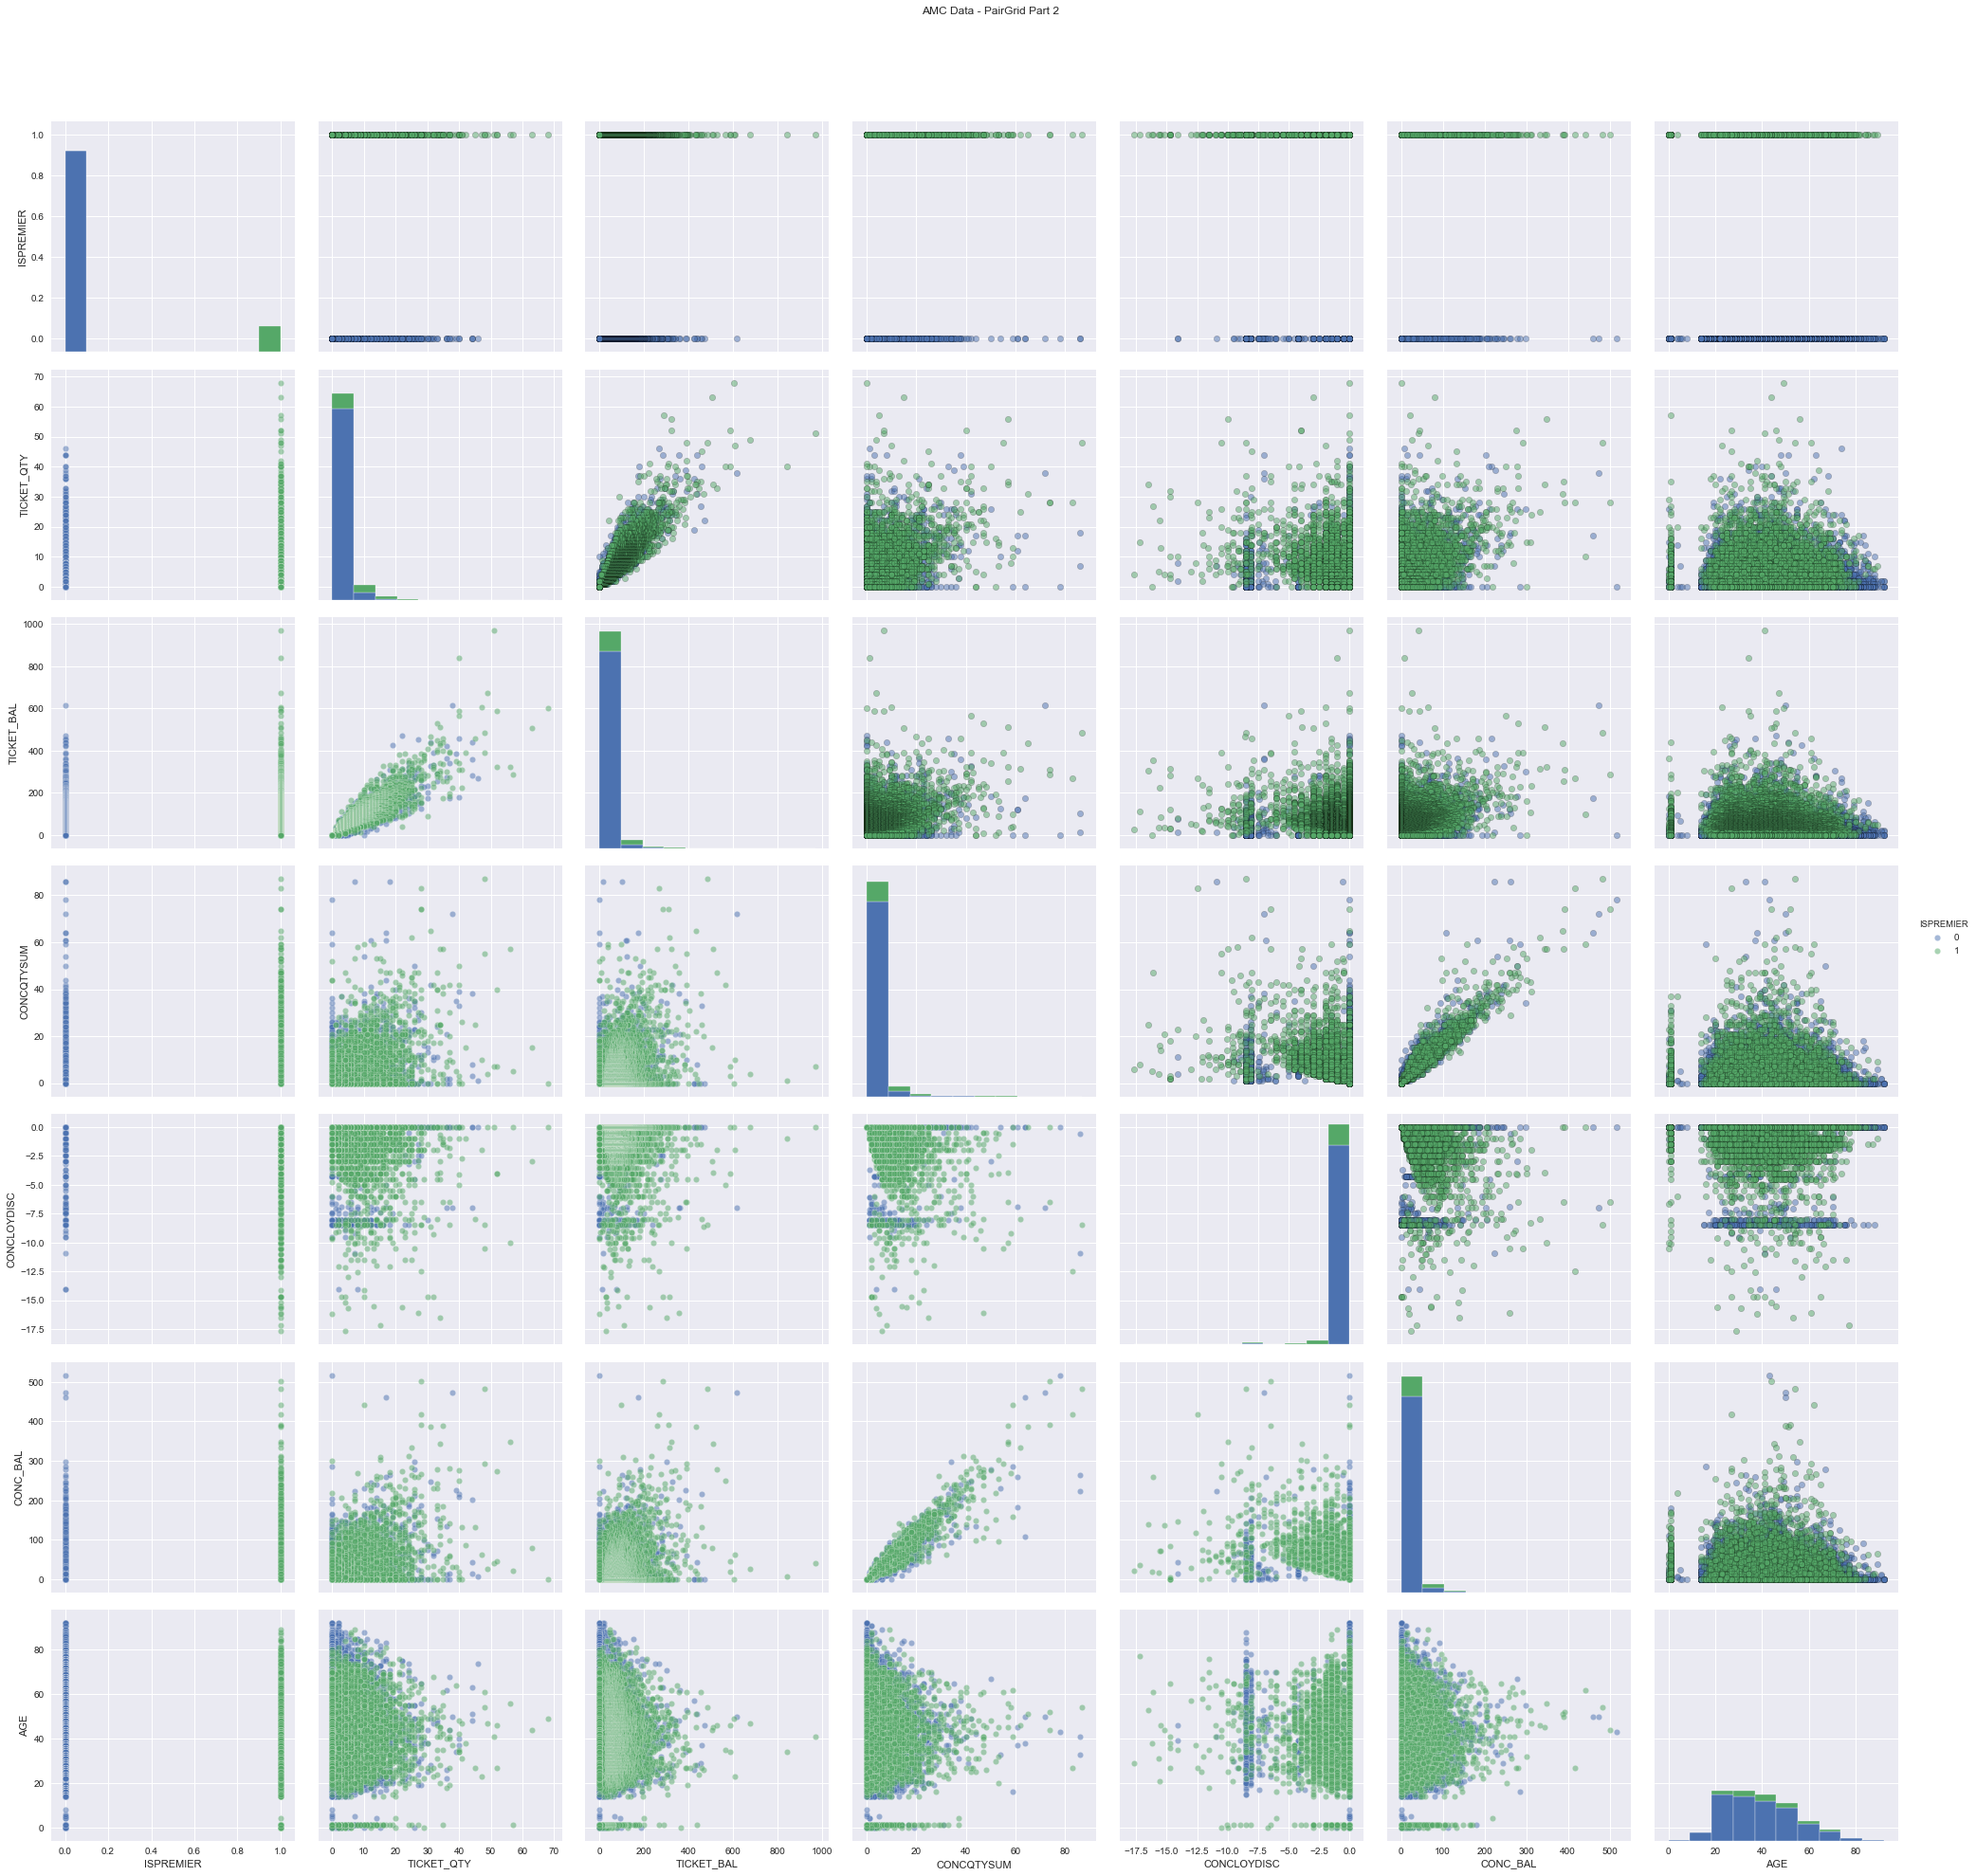

In [53]:
g=sns.PairGrid(df[['ISPREMIER','TICKET_QTY','TICKET_BAL','CONCQTYSUM','CONCLOYDISC','CONC_BAL','AGE']],hue='ISPREMIER',size=4, )

#g=sns.PairGrid(df,hue='ISPREMIER',size=3)

g = g.map_upper(plt.scatter,edgecolor="k", s=40,alpha=.5 )
g = g.map_lower(plt.scatter,edgecolor="w", s=40,alpha=.5)
g = g.map_diag(plt.hist, edgecolor="w")
sns.plt.suptitle('AMC Data - PairGrid Part 2')
sns.plt.subplots_adjust(top=.92)
g = g.add_legend()


<a id='V15'></a>
#### Scatter plot: Concession Loyalty Discount vs. Concession Balance

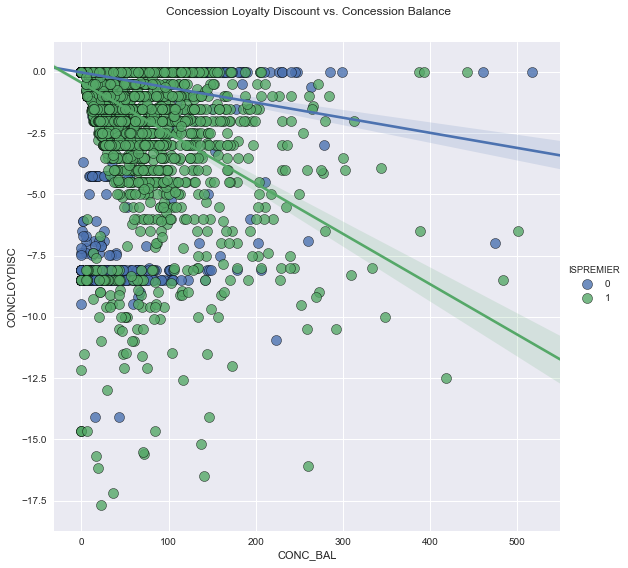

In [54]:
#Scatter Concession Loyalty Discount vs. Concession Balance
plt.figure(figsize=(12,12))
sns.lmplot('CONC_BAL', # Horizontal axis
           'CONCLOYDISC', # Vertical axis
           data=df, # Data source
           fit_reg=True, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                       "s": 100,'linewidths':.5,'edgecolor':'k'},
           hue="ISPREMIER",
           size=8,
           ) # S marker size
sns.plt.suptitle('Concession Loyalty Discount vs. Concession Balance')
sns.plt.subplots_adjust(top=.92)
plt.show()

#### Notes:  

<br>
<br>

<a id='V15'></a>
#### Scatter plot: Concession Balance vs. Ticket Balance

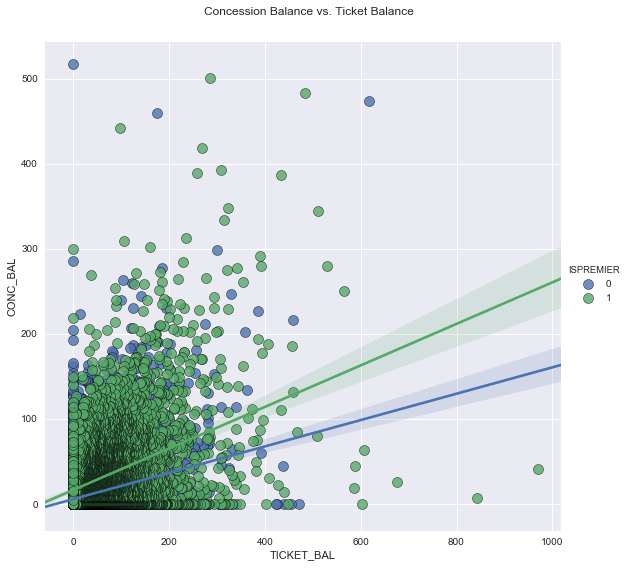

In [55]:
#Scatter Concession Balance vs. Ticket Balance
plt.figure(figsize=(12,12))
sns.lmplot('TICKET_BAL', # Horizontal axis
           'CONC_BAL', # Vertical axis
           data=df, # Data source
           fit_reg=True, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                       "s": 100,'linewidths':.5,'edgecolor':'k'},
           hue="ISPREMIER",
           size=8,
           ) # S marker size
sns.plt.suptitle('Concession Balance vs. Ticket Balance')
sns.plt.subplots_adjust(top=.92)
plt.show()

#### Notes:  

<br>
<br>

<a id='V15'></a>
#### Scatter plot: Ticket Balance vs. Ticket Quantity

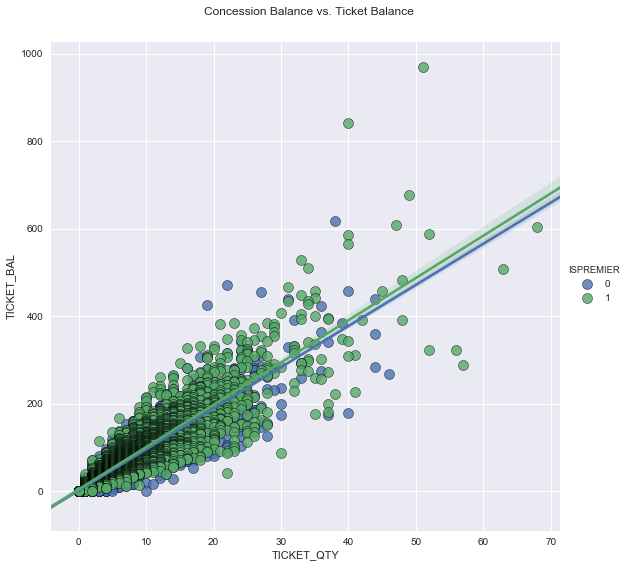

In [56]:
#Scatter Ticket Balance vs. Ticket Quantity
plt.figure(figsize=(12,12))
sns.lmplot('TICKET_QTY', # Horizontal axis
           'TICKET_BAL', # Vertical axis
           data=df, # Data source
           fit_reg=True, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                       "s": 100,'linewidths':.5,'edgecolor':'k'},
           hue="ISPREMIER",
           size=8,
           ) # S marker size
sns.plt.suptitle('Concession Balance vs. Ticket Balance')
sns.plt.subplots_adjust(top=.92)
plt.show()

#### Notes:  

<br>
<br>

<a id='V16'></a>
#### Scatter plot: Last Evaluation vs. Average Monthly Hours

<a id='V18'></a>
### Correlation Table

In [57]:
# Correlation table from the transformed dataframe
df.corr()

ISPREMIER  AGE21PLUS  AGE18TO21  AGE13TO18  \
ISPREMIER             1.000000   0.061112  -0.055834  -0.055062   
AGE21PLUS             0.061112   1.000000  -0.752175  -0.575614   
AGE18TO21            -0.055834  -0.752175   1.000000  -0.050069   
AGE13TO18            -0.055062  -0.575614  -0.050069   1.000000   
LOYALTY_EMAIL_OFFER   0.017670  -0.021198  -0.000344   0.031067   
REWARD_EMAIL          0.016929  -0.011316  -0.003268   0.021269   
REWARD_MOBILE         0.096219  -0.018910  -0.006016   0.031597   
REWARD_SMS           -0.002351  -0.008260  -0.001702  -0.001304   
THEATR_MOB_OFFER      0.101791  -0.018470  -0.006367   0.031809   
THEATR_SMS_OFFER     -0.002351  -0.008260  -0.001702  -0.001304   
LIFE_AWARD_AMT        0.216813   0.039300  -0.036603  -0.024832   
LIFE_SPEND_AMT        0.220822   0.040100  -0.037039  -0.026132   
OL_FEE_WAIVE_AMT      0.065082   0.014899  -0.014371  -0.013728   
EST_INC_RNG           0.131807   0.066996  -0.049905  -0.053198   
EST_HOME_VAL_RNG      0.136758   0.053564  -0.038279  -0.044290   
FREQ_THEATRE         -0.095963   0.036750  -0.012676  -0.039047   
TICKET_QTY            0.454074   0.070456  -0.052170  -0.066338   
TICKET_BAL            0.448898   0.064970  -0.044477  -0.062233   
CONCQTYSUM            0.337030   0.048383  -0.044913  -0.039085   
CONCLOYDISC          -0.336218  -0.030221   0.028610   0.026098   
CONC_BAL              0.346307   0.050361  -0.045631  -0.040643   
AGE                   0.066232   0.490329  -0.332568  -0.298109   
GENDER_0              0.169057   0.038062  -0.027624  -0.029630   
GENDER_1              0.206706   0.021668  -0.011426  -0.022356   
GENDER_3             -0.276863  -0.045798   0.030380   0.039301   
CHILD_0               0.059089   0.040726  -0.036043  -0.029264   
CHILD_1               0.089962   0.034453  -0.023370  -0.031803   
CHILD_3              -0.111129  -0.052690   0.040453   0.043974   
UNK_INC              -0.131482  -0.068929   0.050565   0.056246   
UNK_HOME             -0.135844  -0.058045   0.040209   0.051581   

                     LOYALTY_EMAIL_OFFER  REWARD_EMAIL  REWARD_MOBILE  \
ISPREMIER                       0.017670      0.016929       0.096219   
AGE21PLUS                      -0.021198     -0.011316      -0.018910   
AGE18TO21                      -0.000344     -0.003268      -0.006016   
AGE13TO18                       0.031067      0.021269       0.031597   
LOYALTY_EMAIL_OFFER             1.000000      0.790356       0.417696   
REWARD_EMAIL                    0.790356      1.000000       0.346564   
REWARD_MOBILE                   0.417696      0.346564       1.000000   
REWARD_SMS                      0.003084      0.002637      -0.000040   
THEATR_MOB_OFFER                0.421257      0.350151       0.981348   
THEATR_SMS_OFFER                0.003084      0.002637      -0.000040   
LIFE_AWARD_AMT                 -0.004214     -0.016527       0.008946   
LIFE_SPEND_AMT                 -0.004993     -0.016877       0.009735   
OL_FEE_WAIVE_AMT               -0.031632     -0.029093      -0.033784   
EST_INC_RNG                    -0.062426     -0.061998      -0.201097   
EST_HOME_VAL_RNG               -0.085104     -0.078715      -0.220956   
FREQ_THEATRE                   -0.035628     -0.021071       0.038848   
TICKET_QTY                     -0.055879     -0.050431      -0.003603   
TICKET_BAL                     -0.091406     -0.077944      -0.031016   
CONCQTYSUM                      0.123013      0.101356       0.216142   
CONCLOYDISC                    -0.038158     -0.029910      -0.064730   
CONC_BAL                        0.127483      0.105160       0.224316   
AGE                             0.045671      0.037182       0.047745   
GENDER_0                       -0.014522      0.006618      -0.224844   
GENDER_1                       -0.073223     -0.042776      -0.161953   
GENDER_3                        0.060661      0.022982       0.293119   
CHILD_0                        -0.025334     

<a id='V19'></a>
### Heatmap

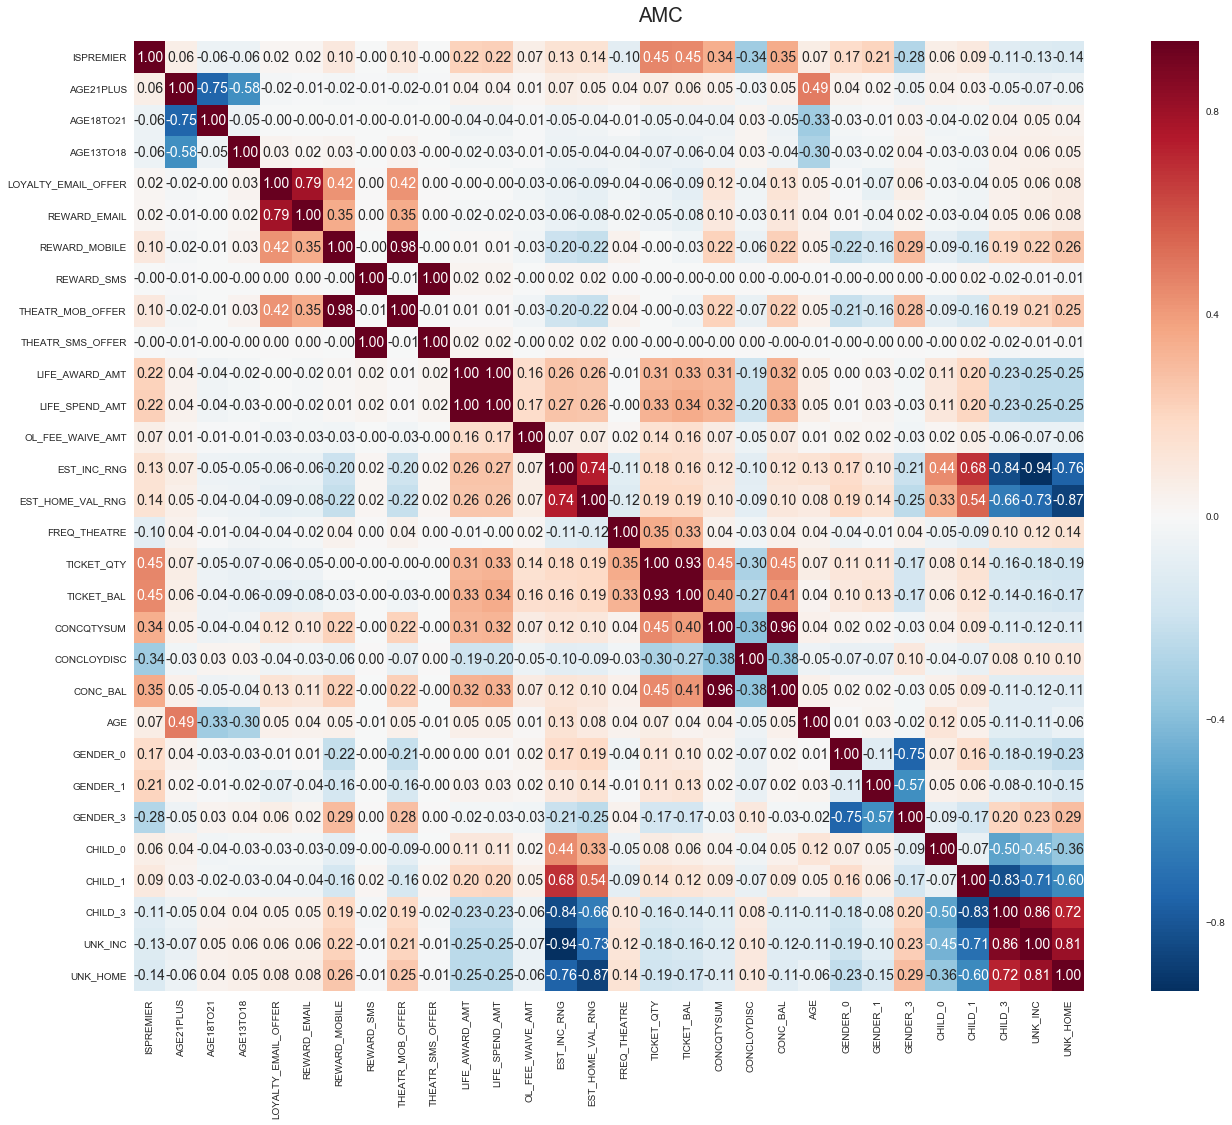

In [58]:
# Correlation Heatmap
# Show correlation plot using Seaborn heatmap
plt.figure(figsize=(24,16))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".2f",annot_kws={"size":14})
sns.set(font_scale = 1.4)
sns.plt.suptitle('AMC')
sns.plt.subplots_adjust(top=.95)
plt.show()

<a id='corr_analysis'></a> 
### Correlation analysis

#### Defining the following levels of correlation:
* -1.0 to -0.5 or +0.5 to +1.0: 	**Strong**
* -0.5 to -0.3 or +0.3 to +0.5: 	**Moderate**
* -0.3 to -0.1 or +0.1 to +0.3: 	**Weak**
*        -0.1 to 0.1 	      :  **Very weak**



#### For the y variable, **'ISPREMIER'**, there is:
 * a moderate positive correlation with 
	* Ticket quantity (TICKET_QTY)
	* Ticket balance (TICKET_BAL)
	* Concession quantity sum (CONCQTYSUM)
	* Concession balance (CONC_BAL)

* a moderate negative correlation with concession loyalty discount (CONCLOYDISC).
  

* a weak positive correlation with
	* Estimated income range (EST_INC_RNG)
	* Estimated home value range (EST_HOME_VAL_RNG)
	* Lifetime rewards earned (LIFE_AWARD_AMT)
	* Lifetime amount spent by member (LIFE_SPEND_AMT)
	* Theater-level mobile offers opt-in (THEATR_MOB_OFFER)
	* AMC Stubs mobile notifications opt-in (REWARD_MOBILE)
	* Gender female (GENDER_0)
	* Gender male (GENDER_1)
	
* a weak negative correlation with
	* Gender unknown (GENDER_3)
	* Frequently visted theater selected (FREQ_THEATRE)
	* Children present in household (CHILD_PRES)

* a very weak positive correlation with
	* Age 21 plus (AGE21PLUS)
	* Loyalty email offers opt-in (LOYALTY_EMAIL_OFFER)
	* AMC Stubs Rewards email opt-in (REWARD_EMAIL)
	* Amount of online fees waived (OL_FEE_WAIVE_AMT)
	
* a very weak negative correlation with
	* Age 18 to 21 (AGE18TO21)
	* Age 13 to 18 (AGE13TO18)
	* Rewards SMS message opt-in (REWARD_SMS)
	* Theater-level offer SMS message opt-in(THEATR_SMS_OFFER)

	

#### Noteworthy correlations between independent variables.

* Strong correlations between estimate income range(EST_INC_RNG), estimated home value range(EST_HOME_VAL_RNG), and children present in household(CHILD_PRES).
* Strong correlations between loyalty email offer opt-in(LOYALTY_EMAIL_OFFER) and rewards email offer opt-in(REWARD_EMAIL).
* Strong correlation between ticket quantity (TICKET_QTY) and ticket balance (TICKET_BAL)
* Strong correlation between concession quantity sum (CONCQTYSUM) and concession balance (CONC_BAL).
* moderate and weak correlations between ticket quantity (TICKET_QTY), ticket balance (TICKET_BAL), concession quantity sum (CONCQTYSUM), concession balance (CONC_BAL), concession loyalty discount (CONCLOYDISC).
    
    

<a id='quest_5'></a>
## 5. Classification Models

<a id='CM1'></a>
### Decision Tree

In [59]:
y=df['ISPREMIER']
X=df.drop(['ISPREMIER'],axis=1)


In [60]:
# evaluate the model by splitting into train (70%) and test sets (30%)
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# name your model as "dt"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "----------------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print "----------------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "----------------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))
print "----------------------------------------------------------------"

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the y value generated by your model
# If they are same, we can say your model is accurate.


0.953077521023
----------------------------------------------------------------
[[12200   328]
 [  336  1287]]
----------------------------------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.97      0.97     12528
          1       0.80      0.79      0.79      1623

avg / total       0.95      0.95      0.95     14151

----------------------------------------------------------------
0.883397308329
----------------------------------------------------------------


In [62]:
tree.export_graphviz(dt, out_file='data/dtree1.dot', feature_names=X.columns)
tree_graph = pdot.graphviz.graph_from_dot_file( 'data/dtree1.dot' )
tree_graph.write_png( 'data/dtree1.png' )

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.472835 to fit



True

In [63]:
from IPython.display import Image
Image(filename='data/dtree1.png')

In [64]:
tree_depth = dt.tree_.max_depth
print color.BOLD + "Tree depth for this model is %i." % tree_depth
print color.END

Tree depth for this model is 28.



**Wow!  We need to simplify!**  

Let's loop through a number of values for max_depth that provides best score.

[0.85348049578321894, 0.85608822470768897, 0.83509960289457674, 0.78288415331701966, 0.63847036243952837, 0.59028331031920422, 0.55036386999696552, 0.51803374308337646, 0.47497695356329112]
0.856088224708


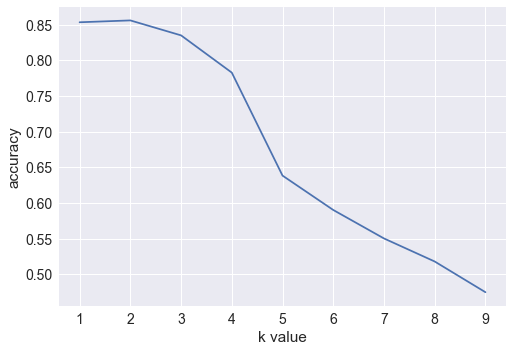

In [65]:
# Get X, y
y=df['ISPREMIER']
X=df.drop(['ISPREMIER'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Loop through to find best max_depth with min_samples_leaf=5
k_range = range(1, 10)
scores = []
for k in k_range:
    #knn = KNeighborsClassifier(n_neighbors=k)
    dtt = DecisionTreeClassifier(max_depth=k, min_samples_leaf=5)
    dtt.fit(X_train, y_train)
    scores.append(np.mean(cross_val_score(dtt, X, y, cv=10, scoring='accuracy')))
    
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('accuracy')
print scores
print np.max(scores)    
    
    

It appears that **k=2** provided the maximum score for the default min_samples_leaf.  Let's use **max_depth=2** specifically in our model.

In [66]:
y=df['ISPREMIER']
X=df.drop(['ISPREMIER'],axis=1)

# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# Set max_depth=3, min_samples_leaf=5
dt8 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)
dt8.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Model Evaluation

In [67]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, dt8.predict(X_test))
print "----------------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt8.predict(X_test))
print "----------------------------------------------------------------"
print metrics.classification_report(y_test, dt8.predict(X_test))
print "----------------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt8.predict(X_test))
print "----------------------------------------------------------------"

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the y value generated by your model
# If they are same, we can say your model is accurate.

0.939650908063
----------------------------------------------------------------
[[12493    55]
 [  799   804]]
----------------------------------------------------------------
             precision    recall  f1-score   support

          0       0.94      1.00      0.97     12548
          1       0.94      0.50      0.65      1603

avg / total       0.94      0.94      0.93     14151

----------------------------------------------------------------
0.748588203581
----------------------------------------------------------------


In [68]:
# evaluate the decision tree model using 10-fold cross-validation
scores = cross_val_score(dt8, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.11721068  0.94233623  0.94784821  0.94064024  0.93491626  0.93788425
  0.94127623  0.93638677  0.93871925  0.92366412]
0.856088224708


#### Visualize Decision Tree Model

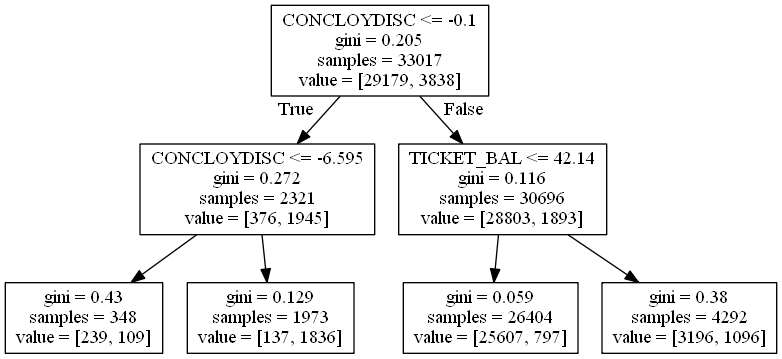

In [69]:
# Generate tree graph image
tree.export_graphviz(dt8, out_file='data/dtree8.dot', feature_names=X.columns)
tree_graph = pdot.graphviz.graph_from_dot_file( 'data/dtree8.dot' )
tree_graph.write_png( 'data/dtree8.png' )

#Display image
from IPython.display import Image
Image(filename='data/dtree8.png')

This model provides a slightly lower score than the 28 level model, but the complexity has been reduced.  However, this might be too simple.

This model indicates that the concession loyalty discount and total tickets sold are the main variables of importance when predicting Insider members who upgrade to Premier.

<a id='CM3'></a>
### Logistic Regression

In [70]:
# Set X and y
y=df['ISPREMIER']
X=df.drop(['ISPREMIER'],axis=1)

# evaluate the model by splitting into train and test sets and build a logistic regression model
# name it as "lr"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Model Evaluation

In [71]:
#Model evaluation
print "Accuracy Score:",metrics.accuracy_score(y_test, lr.predict(X_test))
print "----------------------------------------------------------------"
print "Confusion Matrix:"
print "                     Predict"
print "                    Not   "
print "                   Quit   Quit"
print "Actual: Not Quit:" , metrics.confusion_matrix(y_test, lr.predict(X_test))[0:1]
print "Actual:     Quit:" , metrics.confusion_matrix(y_test, lr.predict(X_test))[1:2]
#print metrics.confusion_matrix(y_test, lr.predict(X_test))
print "----------------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))
print "----------------------------------------------------------------"
print metrics.roc_auc_score(y_test, lr.predict(X_test))
print "----------------------------------------------------------------"

Accuracy Score: 0.930746943679
----------------------------------------------------------------
Confusion Matrix:
                     Predict
                    Not   
                   Quit   Quit
Actual: Not Quit: [[12295   233]]
Actual:     Quit: [[747 876]]
----------------------------------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.98      0.96     12528
          1       0.79      0.54      0.64      1623

avg / total       0.93      0.93      0.92     14151

----------------------------------------------------------------
0.760571440122
----------------------------------------------------------------


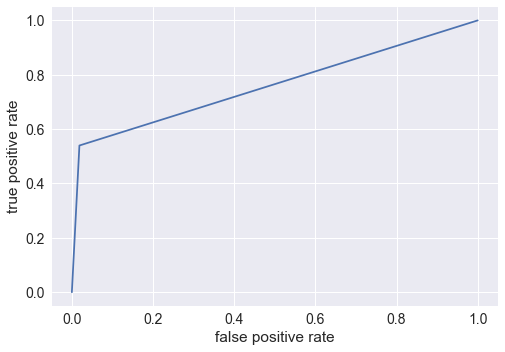

False-positive rate: [ 0.          0.01859834  1.        ]
True-positive rate:  [ 0.          0.53974122  1.        ]
AUC score:  0.760571440122


In [72]:
# ROC chart

fpr, tpr, thresholds = metrics.roc_curve(y_test,lr.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate: ", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, lr.predict(X_test))

In [73]:
# Coefficients

# Create coefficients dataframe
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients.columns = ["X_Var", "Coef"]
# absolute value of coefficient so we use to sort 
#coefficients['Coef_abs']=coefficients['Coef'].abs()
coefficients.sort_values(by='Coef',ascending=[0])
#pr=lr.predict(X_test)
#lr.predict_proba(X_test)


X_Var      Coef
7      THEATR_MOB_OFFER  0.837902
5         REWARD_MOBILE  0.732661
22             GENDER_1  0.592119
28             UNK_HOME  0.584646
15           TICKET_QTY  0.148528
9        LIFE_AWARD_AMT  0.087202
4          REWARD_EMAIL  0.071553
21             GENDER_0  0.056301
16           TICKET_BAL  0.024917
12          EST_INC_RNG  0.022203
19             CONC_BAL  0.019071
20                  AGE  0.011476
8      THEATR_SMS_OFFER -0.002103
6            REWARD_SMS -0.002103
11     OL_FEE_WAIVE_AMT -0.002242
13     EST_HOME_VAL_RNG -0.003075
10       LIFE_SPEND_AMT -0.008938
17           CONCQTYSUM -0.042061
3   LOYALTY_EMAIL_OFFER -0.082042
27              UNK_INC -0.230247
26              CHILD_3 -0.274623
18          CONCLOYDISC -0.378127
24              CHILD_0 -0.506238
25              CHILD_1 -0.540098
0             AGE21PLUS -1.564414
1             AGE18TO21 -1.863730
23             GENDER_3 -1.969378
2             AGE13TO18 -2.430989
14         FREQ_THEATRE -2.812012

In [74]:
# evaluate the logistic regression model using 10-fold cross-validation
scores = cross_val_score(lr, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()


[ 0.45337007  0.96926012  0.96290015  0.95357219  0.93915624  0.92940428
  0.92283231  0.91518236  0.90330789  0.89206955]
0.884105516


Compared to Decision Trees model score, Logistic regression does not appear to be a good choice.

<a id='CM4'></a>
### Random Forest Classifier

In [75]:
# Set X and y
y=df['ISPREMIER']
X=df.drop(['ISPREMIER'],axis=1)

# evaluate the model by splitting into train and test sets and build a logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

rfc = RandomForestClassifier(n_estimators=20)    #building 20 decision trees

rfc=rfc.fit(X_train,y_train)



#### Model Evaluation

In [76]:
# generate evaluation metrics
print"----------------------------------------------------"
print metrics.accuracy_score(y_test, rfc.predict(X_test)) #overall accuracy
print"----------------------------------------------------"
print metrics.confusion_matrix(y_test, rfc.predict(X_test))
print"----------------------------------------------------"
print metrics.classification_report(y_test, rfc.predict(X_test))

----------------------------------------------------
0.965090806303
----------------------------------------------------
[[12375   153]
 [  341  1282]]
----------------------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.99      0.98     12528
          1       0.89      0.79      0.84      1623

avg / total       0.96      0.97      0.96     14151



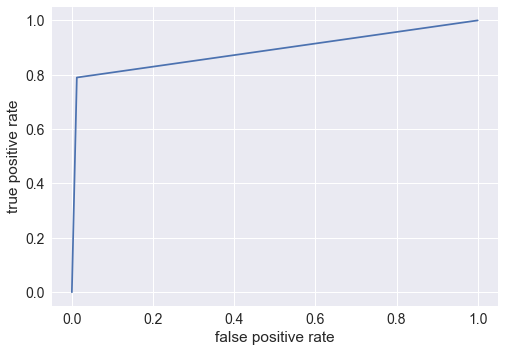

False-positive rate: [ 0.          0.01221264  1.        ]
True-positive rate:  [ 0.          0.78989526  1.        ]
AUC score:  0.888841306011


In [77]:
# ROC chart

fpr, tpr, thresholds = metrics.roc_curve(y_test,rfc.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate: ", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, rfc.predict(X_test))

In [78]:
# evaluate the logistic regression model using 10-fold cross-validation
scores = cross_val_score(rfc, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()


[ 0.12272149  0.49035404  0.81492474  0.94106424  0.92919228  0.78482086
  0.40555438  0.58905852  0.92917727  0.88570823]
0.689257604887


**Based on this score, the Random Forest Classifier seems to be the best model for this data set.**

Let's look at the feature importance by decreasing order of importance.

In [79]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0, 'REWARD_SMS'), (0.0, 'THEATR_SMS_OFFER'), (0.0009, 'AGE13TO18'), (0.0016, 'CHILD_0'), (0.0018, 'AGE18TO21'), (0.0022, 'AGE21PLUS'), (0.003, 'UNK_INC'), (0.0033, 'CHILD_1'), (0.0037, 'CHILD_3'), (0.0052, 'REWARD_EMAIL'), (0.0066, 'UNK_HOME'), (0.007, 'LOYALTY_EMAIL_OFFER'), (0.0096, 'GENDER_0'), (0.0113, 'EST_INC_RNG'), (0.017, 'GENDER_1'), (0.0176, 'EST_HOME_VAL_RNG'), (0.0201, 'GENDER_3'), (0.0222, 'LIFE_AWARD_AMT'), (0.0249, 'OL_FEE_WAIVE_AMT'), (0.0359, 'CONCQTYSUM'), (0.0365, 'THEATR_MOB_OFFER'), (0.0377, 'REWARD_MOBILE'), (0.0423, 'CONC_BAL'), (0.0502, 'AGE'), (0.0799, 'LIFE_SPEND_AMT'), (0.0947, 'FREQ_THEATRE'), (0.1022, 'TICKET_BAL'), (0.1152, 'TICKET_QTY'), (0.2474, 'CONCLOYDISC')]


In [80]:
feature_rank = pd.DataFrame({'Feature':X.columns, 'Importance':rfc.feature_importances_})
feature_rank.sort_values(['Importance'], ascending=[0])


Feature  Importance
18          CONCLOYDISC    0.247387
15           TICKET_QTY    0.115244
16           TICKET_BAL    0.102220
14         FREQ_THEATRE    0.094743
10       LIFE_SPEND_AMT    0.079895
20                  AGE    0.050159
19             CONC_BAL    0.042336
5         REWARD_MOBILE    0.037672
7      THEATR_MOB_OFFER    0.036476
17           CONCQTYSUM    0.035897
11     OL_FEE_WAIVE_AMT    0.024860
9        LIFE_AWARD_AMT    0.022189
23             GENDER_3    0.020078
13     EST_HOME_VAL_RNG    0.017592
22             GENDER_1    0.017041
12          EST_INC_RNG    0.011343
21             GENDER_0    0.009608
3   LOYALTY_EMAIL_OFFER    0.007021
28             UNK_HOME    0.006596
4          REWARD_EMAIL    0.005192
26              CHILD_3    0.003737
25              CHILD_1    0.003300
27              UNK_INC    0.003017
0             AGE21PLUS    0.002150
1             AGE18TO21    0.001792
24              CHILD_0    0.001572
2             AGE13TO18    0.000883
8      THEATR_SMS_OFFER    0.000000
6            REWARD_SMS    0.000000

**Notes:**

<br>
<br>

<a id='quest_6'></a>
### Feature Selection

<a id='FS3'></a>
### Recursive Feature Elimination

In [81]:
# Set X and y
y=df['ISPREMIER']
X=df.drop(['ISPREMIER'],axis=1)

model = LogisticRegression()
rfe = RFE(model, 5)  #asking five best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)




[ True  True  True False False False False  True False False False False
 False False False False False False False False False False False  True
 False False False False False]
[ 1  1  1 12 13  2 21  1 22 19 20 25 23 24  3  7 16 15  4 17 18 14  5  1 10
  9 11  8  6]


In [82]:
# Features sorted by their rank
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

feature  importance
0             AGE21PLUS           1
1             AGE18TO21           1
2             AGE13TO18           1
3   LOYALTY_EMAIL_OFFER          12
4          REWARD_EMAIL          13
5         REWARD_MOBILE           2
6            REWARD_SMS          21
7      THEATR_MOB_OFFER           1
8      THEATR_SMS_OFFER          22
9        LIFE_AWARD_AMT          19
10       LIFE_SPEND_AMT          20
11     OL_FEE_WAIVE_AMT          25
12          EST_INC_RNG          23
13     EST_HOME_VAL_RNG          24
14         FREQ_THEATRE           3
15           TICKET_QTY           7
16           TICKET_BAL          16
17           CONCQTYSUM          15
18          CONCLOYDISC           4
19             CONC_BAL          17
20                  AGE          18
21             GENDER_0          14
22             GENDER_1           5
23             GENDER_3           1
24              CHILD_0          10
25              CHILD_1           9
26              CHILD_3          11
27              UNK_INC           8
28             UNK_HOME           6

In [83]:
# another method
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, 'AGE13TO18'), (1, 'AGE18TO21'), (1, 'AGE21PLUS'), (1, 'GENDER_3'), (1, 'THEATR_MOB_OFFER'), (2, 'REWARD_MOBILE'), (3, 'FREQ_THEATRE'), (4, 'CONCLOYDISC'), (5, 'GENDER_1'), (6, 'UNK_HOME'), (7, 'TICKET_QTY'), (8, 'UNK_INC'), (9, 'CHILD_1'), (10, 'CHILD_0'), (11, 'CHILD_3'), (12, 'LOYALTY_EMAIL_OFFER'), (13, 'REWARD_EMAIL'), (14, 'GENDER_0'), (15, 'CONCQTYSUM'), (16, 'TICKET_BAL'), (17, 'CONC_BAL'), (18, 'AGE'), (19, 'LIFE_AWARD_AMT'), (20, 'LIFE_SPEND_AMT'), (21, 'REWARD_SMS'), (22, 'THEATR_SMS_OFFER'), (23, 'EST_INC_RNG'), (24, 'EST_HOME_VAL_RNG'), (25, 'OL_FEE_WAIVE_AMT')]


In [84]:
#here I select 5 most significant features only (including Age)
X_logistic = df[['AGE13TO18', 'AGE21PLUS', 'GENDER_3', 'THEATR_MOB_OFFER', 'REWARD_MOBILE','FREQ_THEATRE','CONCLOYDISC','GENDER_1','UNK_HOME','TICKET_QTY']]
print X_logistic.head()

   AGE13TO18  AGE21PLUS  GENDER_3  THEATR_MOB_OFFER  REWARD_MOBILE  \
0          0          1         1                 0              0   
1          0          1         0                 1              1   
2          0          1         1                 0              0   
3          0          1         0                 0              1   
4          0          1         0                 1              1   

   FREQ_THEATRE  CONCLOYDISC  GENDER_1  UNK_HOME  TICKET_QTY  
0             1          0.0         0         1          51  
1             0         -1.0         1         0          40  
2             1          0.0         0         1          49  
3             1         -7.0         0         0          38  
4             1         -2.0         1         0          47  


##### Evaluate LogisticRegression model with 5 most significant feature from RFE.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.925164299343
[[12284   244]
 [  815   808]]
             precision    recall  f1-score   support

          0       0.94      0.98      0.96     12528
          1       0.77      0.50      0.60      1623

avg / total       0.92      0.93      0.92     14151

0.739183563384


????


<a id='NT2'></a>
### RBF SVC: Radial Basis Function - Support Vector Classifier


In [86]:
y=df['ISPREMIER']
X=df.drop(['ISPREMIER'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.svm import SVC
clf = SVC(decision_function_shape='ovr')
clf.fit(X, y) 
#SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
#    max_iter=-1, probability=False, random_state=None, shrinking=True,
#    tol=0.001, verbose=False)
#print(clf.predict(X))
print metrics.accuracy_score(y_test, clf.predict(X_test))
print metrics.confusion_matrix(y_test, clf.predict(X_test))
print metrics.classification_report(y_test, clf.predict(X_test))
print metrics.roc_auc_score(y_test, clf.predict(X_test))


0.9788000848
[[12520     8]
 [  292  1331]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     12528
          1       0.99      0.82      0.90      1623

avg / total       0.98      0.98      0.98     14151

0.909723845204


The RBF SVC model provides a good score with just the default parameters.


In [ ]:
clf.dual_coef_


<a id='quest_7'></a>
## . Model Selection

### Which Model?



<br>
<br>
<br>


<a id='quest_9'></a>
## . Results

### a. Hypotheses Results




### b. Recommendations

